In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df = pd.read_excel('/Users/mac/Desktop/учеба/проект/avito_data_main.xlsx')
df = df.drop(columns=['item_id'])
df

,category,days_active,has_video,photo_count,title,title_length,description_length,description_word_count,DescriptionRu,breed,...,seller_count_reviews,seller_rating,page_views,page_views_by_day,contacts,favorites,conversion_page_views_contacts_%,conversion_page_views_favorites_%,conversion_page_views_favorites_contacts_%,sentiment
0,Кошки,25,False,2,"Отдам котиков, в хорошие руки 4 мес",35,8,1,Красавцы,NaN,...,NaN,NaN,106,4.240000,3,4,0.03,0.75,0.04,1.000000
1,Кошки,25,False,1,Бенгальская кошка,17,5,1,Супер,Бенгальская,...,0.0,0.0,36,1.440000,0,0,0.00,NaN,0.00,0.999089
2,Кошки,11,False,5,Кот 3 года вислоухий,20,20,4,Кот красавец 3 года,NaN,...,1.0,1.0,5,0.454545,0,0,0.00,NaN,0.00,0.997077
3,Кошки,25,False,1,Сибирская кошка,15,16,3,Красавица в дом!,Сибирская,...,2.0,5.0,56,2.240000,1,1,0.02,1.00,0.02,0.997066
4,Кошки,25,False,4,Кошки мейн-кун,14,21,3,Хорошая милая кошечка,Мейн-кун,...,0.0,0.0,19,0.760000,0,0,0.00,NaN,0.00,0.995826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49968,Кошки,25,False,10,Шотландская вислоухая кошка,27,146,24,"Кошке 4 года, не стерилизованная, ни разу не к...",Шотландская,...,13.0,5.0,19,0.760000,1,1,0.05,1.00,0.05,-0.673896
49969,Кошки,25,False,2,Британская вислоухая,20,100,22,Девочка. Уже больше года. У ребенка оказалась ...,Британская,...,1.0,5.0,72,2.880000,1,3,0.01,0.33,0.04,-0.710234
49970,Кошки,2,False,4,Красивые здоровые кот и кошка 3 года,36,216,26,"Умерла хозяйка, бабушка, кошки никому не нужны...",NaN,...,23.0,5.0,33,16.500000,0,1,0.00,0.00,0.03,-0.714857
49971,Кошки,25,False,2,Кошка в дар бесплатно,21,50,11,без домная кошка мне 9 лет и мне очень жалко к...,NaN,...,0.0,0.0,19,0.760000,0,0,0.00,NaN,0.00,-0.876198


In [70]:
def outlier(df, col):
    f_b = df[col].quantile(0.25)
    s_b = df[col].quantile(0.75)
    iqr = s_b - f_b
    lower = f_b - 3 * iqr
    higher = s_b + 3 * iqr
    df_filtered = df[(df[col] >= lower) & (df[col] <= higher)].copy() 
    return df_filtered
    

In [17]:
outlier(df, 'page_views_by_day')

,category,days_active,has_video,photo_count,title,title_length,description_length,description_word_count,DescriptionRu,breed,...,seller_count_reviews,seller_rating,page_views,page_views_by_day,contacts,favorites,conversion_page_views_contacts_%,conversion_page_views_favorites_%,conversion_page_views_favorites_contacts_%,sentiment
1,Кошки,25,False,2,Кошка в дар бесплатно,21,50,11,без домная кошка мне 9 лет и мне очень жалко к...,NaN,...,0.0,0.0,19,0.760000,0,0,0.00,NaN,0.00,-0.876198
2,Кошки,2,False,4,Красивые здоровые кот и кошка 3 года,36,216,26,"Умерла хозяйка, бабушка, кошки никому не нужны...",NaN,...,23.0,5.0,33,16.500000,0,1,0.00,0.00,0.03,-0.714857
3,Кошки,25,False,2,Британская вислоухая,20,100,22,Девочка. Уже больше года. У ребенка оказалась ...,Британская,...,1.0,5.0,72,2.880000,1,3,0.01,0.33,0.04,-0.710234
4,Кошки,25,False,10,Шотландская вислоухая кошка,27,146,24,"Кошке 4 года, не стерилизованная, ни разу не к...",Шотландская,...,13.0,5.0,19,0.760000,1,1,0.05,1.00,0.05,-0.673896
5,Кошки,25,False,1,Шотландская,11,98,14,"Кот. Не кастрированный, в связи с частыми длит...",Шотландская,...,3.0,5.0,19,0.760000,1,1,0.05,1.00,0.05,-0.650743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49968,Кошки,25,False,4,Кошки мейн-кун,14,21,3,Хорошая милая кошечка,Мейн-кун,...,0.0,0.0,19,0.760000,0,0,0.00,NaN,0.00,0.995826
49969,Кошки,25,False,1,Сибирская кошка,15,16,3,Красавица в дом!,Сибирская,...,2.0,5.0,56,2.240000,1,1,0.02,1.00,0.02,0.997066
49970,Кошки,11,False,5,Кот 3 года вислоухий,20,20,4,Кот красавец 3 года,NaN,...,1.0,1.0,5,0.454545,0,0,0.00,NaN,0.00,0.997077
49971,Кошки,25,False,1,Бенгальская кошка,17,5,1,Супер,Бенгальская,...,0.0,0.0,36,1.440000,0,0,0.00,NaN,0.00,0.999089


In [18]:
df['page_views_by_day'].describe()

count    44714.000000
mean         4.960083
std          7.510926
min          0.000000
25%          0.520000
50%          1.608696
75%          5.680000
max         37.714286
Name: page_views_by_day, dtype: float64

In [19]:
df['sentiment'].describe()

count    44714.000000
mean         0.067194
std          0.203205
min         -0.876198
25%         -0.054085
50%          0.028188
75%          0.153491
max          1.000000
Name: sentiment, dtype: float64

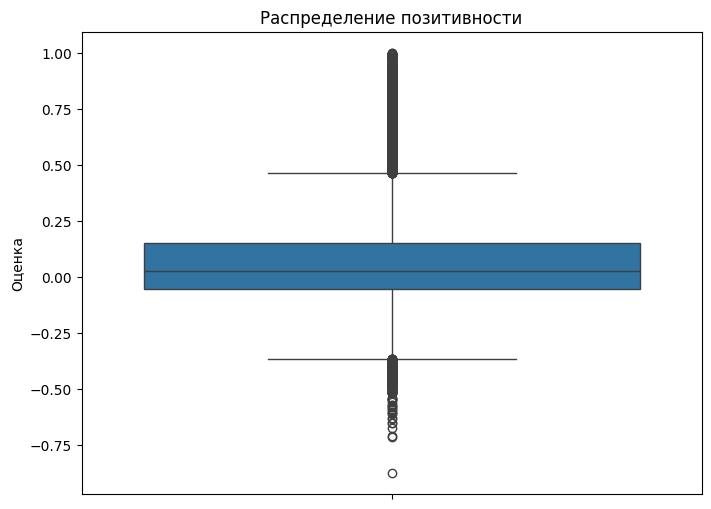

In [20]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['sentiment'])
plt.title('Распределение позитивности')
plt.ylabel('Оценка')
plt.show()

In [ ]:
def classify_sentiment(score):
    if score < -0.15:
        return 'negative'
    elif -0.15 <= score < 0.15:
        return 'neutral'
    else:
        return 'positive'


In [183]:
df['sentiment_group'] = df['sentiment'].apply(classify_sentiment)
df

,category,days_active,has_video,photo_count,title,title_length,description_length,description_word_count,DescriptionRu,breed,...,seller_rating,page_views,page_views_by_day,contacts,favorites,conversion_page_views_contacts_%,conversion_page_views_favorites_%,conversion_page_views_favorites_contacts_%,sentiment,sentiment_group
0,Кошки,25,False,2,"Отдам котиков, в хорошие руки 4 мес",35,8,1,Красавцы,NaN,...,NaN,106,4.240000,3,4,0.03,0.75,0.04,1.000000,positive
1,Кошки,25,False,1,Бенгальская кошка,17,5,1,Супер,Бенгальская,...,0.0,36,1.440000,0,0,0.00,NaN,0.00,0.999089,positive
2,Кошки,11,False,5,Кот 3 года вислоухий,20,20,4,Кот красавец 3 года,NaN,...,1.0,5,0.454545,0,0,0.00,NaN,0.00,0.997077,positive
3,Кошки,25,False,1,Сибирская кошка,15,16,3,Красавица в дом!,Сибирская,...,5.0,56,2.240000,1,1,0.02,1.00,0.02,0.997066,positive
4,Кошки,25,False,4,Кошки мейн-кун,14,21,3,Хорошая милая кошечка,Мейн-кун,...,0.0,19,0.760000,0,0,0.00,NaN,0.00,0.995826,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49967,Кошки,25,False,1,Шотландская,11,98,14,"Кот. Не кастрированный, в связи с частыми длит...",Шотландская,...,5.0,19,0.760000,1,1,0.05,1.00,0.05,-0.650743,negative
49968,Кошки,25,False,10,Шотландская вислоухая кошка,27,146,24,"Кошке 4 года, не стерилизованная, ни разу не к...",Шотландская,...,5.0,19,0.760000,1,1,0.05,1.00,0.05,-0.673896,negative
49969,Кошки,25,False,2,Британская вислоухая,20,100,22,Девочка. Уже больше года. У ребенка оказалась ...,Британская,...,5.0,72,2.880000,1,3,0.01,0.33,0.04,-0.710234,negative
49970,Кошки,2,False,4,Красивые здоровые кот и кошка 3 года,36,216,26,"Умерла хозяйка, бабушка, кошки никому не нужны...",NaN,...,5.0,33,16.500000,0,1,0.00,0.00,0.03,-0.714857,negative


In [184]:
df['sentiment_group'].value_counts()

sentiment_group
neutral     29265
positive    11395
negative     4054
Name: count, dtype: int64

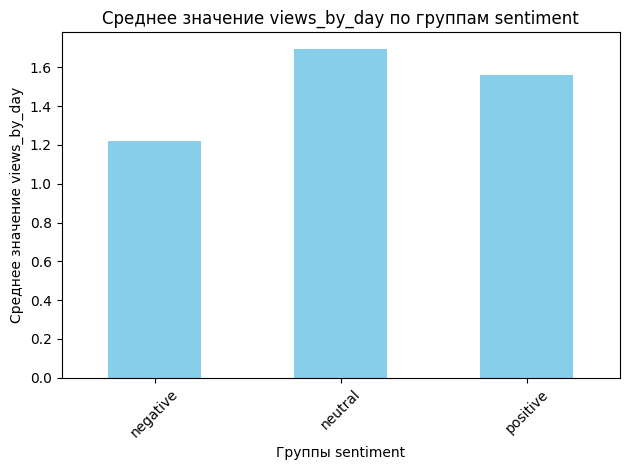

In [185]:
mean_views = df.groupby('sentiment_group')['page_views_by_day'].median().reindex([
 'negative', 'neutral', 'positive'
])

mean_views.plot(kind='bar', color='skyblue')
plt.title('Среднее значение views_by_day по группам sentiment')
plt.xlabel('Группы sentiment')
plt.ylabel('Среднее значение views_by_day')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [181]:
mean_views

sentiment_group
negative    1.24
neutral     1.64
positive    1.56
Name: page_views_by_day, dtype: float64

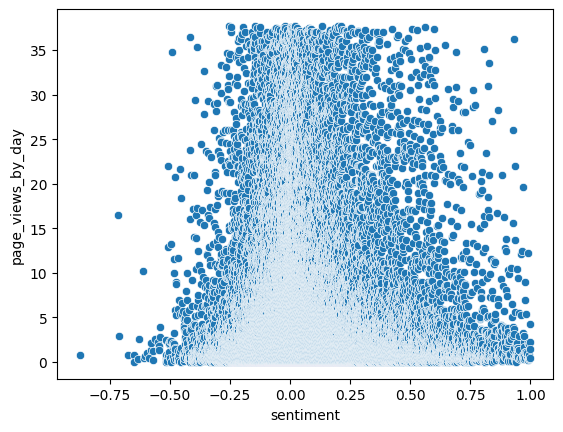

In [58]:
sns.scatterplot(x='sentiment', y='page_views_by_day', data=df)


plt.show()

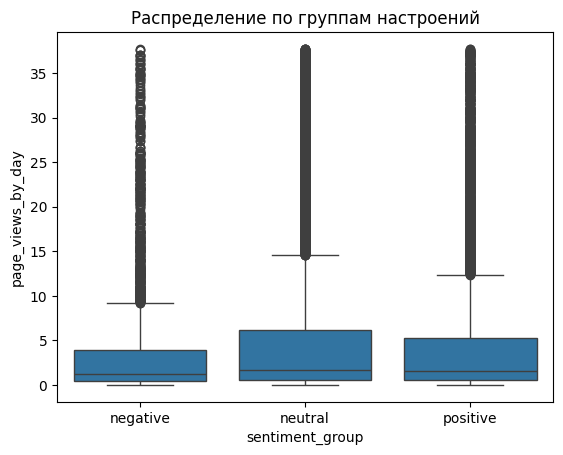

In [59]:
sns.boxplot(x='sentiment_group', y='page_views_by_day', data=df)
plt.title('Распределение по группам настроений')
plt.show()

In [60]:
import scipy.stats as stats

In [159]:
outlier(df, 'page_views_by_day')

,category,days_active,has_video,photo_count,title,title_length,description_length,description_word_count,DescriptionRu,breed,...,seller_count_reviews,seller_rating,page_views,page_views_by_day,contacts,favorites,conversion_page_views_contacts_%,conversion_page_views_favorites_%,conversion_page_views_favorites_contacts_%,sentiment
0,Кошки,25,False,2,"Отдам котиков, в хорошие руки 4 мес",35,8,1,Красавцы,NaN,...,NaN,NaN,106,4.240000,3,4,0.03,0.75,0.04,1.000000
1,Кошки,25,False,1,Бенгальская кошка,17,5,1,Супер,Бенгальская,...,0.0,0.0,36,1.440000,0,0,0.00,NaN,0.00,0.999089
2,Кошки,11,False,5,Кот 3 года вислоухий,20,20,4,Кот красавец 3 года,NaN,...,1.0,1.0,5,0.454545,0,0,0.00,NaN,0.00,0.997077
3,Кошки,25,False,1,Сибирская кошка,15,16,3,Красавица в дом!,Сибирская,...,2.0,5.0,56,2.240000,1,1,0.02,1.00,0.02,0.997066
4,Кошки,25,False,4,Кошки мейн-кун,14,21,3,Хорошая милая кошечка,Мейн-кун,...,0.0,0.0,19,0.760000,0,0,0.00,NaN,0.00,0.995826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49967,Кошки,25,False,1,Шотландская,11,98,14,"Кот. Не кастрированный, в связи с частыми длит...",Шотландская,...,3.0,5.0,19,0.760000,1,1,0.05,1.00,0.05,-0.650743
49968,Кошки,25,False,10,Шотландская вислоухая кошка,27,146,24,"Кошке 4 года, не стерилизованная, ни разу не к...",Шотландская,...,13.0,5.0,19,0.760000,1,1,0.05,1.00,0.05,-0.673896
49969,Кошки,25,False,2,Британская вислоухая,20,100,22,Девочка. Уже больше года. У ребенка оказалась ...,Британская,...,1.0,5.0,72,2.880000,1,3,0.01,0.33,0.04,-0.710234
49970,Кошки,2,False,4,Красивые здоровые кот и кошка 3 года,36,216,26,"Умерла хозяйка, бабушка, кошки никому не нужны...",NaN,...,23.0,5.0,33,16.500000,0,1,0.00,0.00,0.03,-0.714857


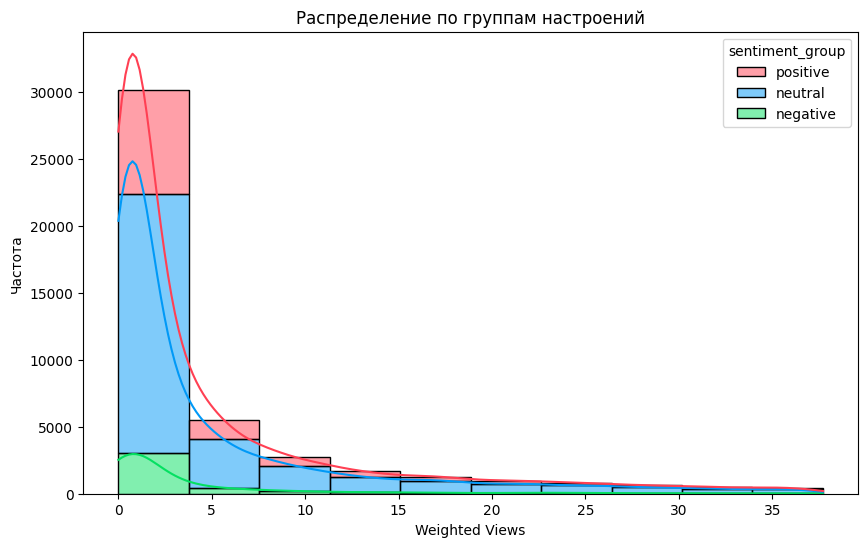

In [165]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='page_views_by_day', hue='sentiment_group', palette=['#FF4053','#0099F7','#04E061'], kde=True, bins=10, multiple='stack')
plt.title('Распределение по группам настроений')
plt.xlabel('Weighted Views')
plt.ylabel('Частота')
plt.show()

In [62]:
for group in df['sentiment_group'].unique():
    stat, p_value = stats.shapiro(df[df['sentiment_group'] == group]['page_views_by_day'])
    print(f'Группа {group}: p-значение = {p_value}')

    if p_value > 0.05:
        print('Не отвергаем нулевую гипотезу: распределение нормальное.')
    else:
        print('Отвергаем нулевую гипотезу: распределение ненормальное.')

Группа negative: p-значение = 2.0715173749647768e-70
Отвергаем нулевую гипотезу: распределение ненормальное.
Группа neutral: p-значение = 2.0581999066455695e-114
Отвергаем нулевую гипотезу: распределение ненормальное.
Группа positive: p-значение = 3.3021524396821804e-92
Отвергаем нулевую гипотезу: распределение ненормальное.


/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 29265.
  res = hypotest_fun_out(*samples, **kwds)
/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11395.
  res = hypotest_fun_out(*samples, **kwds)


In [63]:
normal_distribution = all([
    stats.shapiro(df[df['sentiment_group'] == group]['page_views_by_day'])[1] > 0.05 
    for group in df['sentiment_group'].unique()
])

if normal_distribution:
    print('Используем ANOVA.')
    anova_result = stats.f_oneway(
        df[df['sentiment_group'] == 'negative']['page_views_by_day'],
        df[df['sentiment_group'] == 'neutral']['page_views_by_day'],
        df[df['sentiment_group'] == 'positive']['page_views_by_day']
    )
    print('p-значение ANOVA:', anova_result.pvalue)
else:
    print('Используем тест Краскала-Уоллиса.')
    kruskal_result = stats.kruskal(
        df[df['sentiment_group'] == 'negative']['page_views_by_day'],
        df[df['sentiment_group'] == 'neutral']['page_views_by_day'],
        df[df['sentiment_group'] == 'positive']['page_views_by_day']
    )
    print('p-значение теста Краскала-Уоллиса:', kruskal_result.pvalue)

Используем тест Краскала-Уоллиса.
p-значение теста Краскала-Уоллиса: 8.928065757714656e-26


In [64]:
alpha = 0.05

if 'anova_result' in locals():
    if anova_result.pvalue < alpha:
        print('Существует статистически значимое различие между группами (отвергаем нулевую гипотезу).')
    else:
        print('Нет статистически значимого различия между группами (не отвергаем нулевую гипотезу).')

if 'kruskal_result' in locals():
    if kruskal_result.pvalue < alpha:
        print('Существует статистически значимое различие между группами (отвергаем нулевую гипотезу).')
    else:
        print('Нет статистически значимого различия между группами (не отвергаем нулевую гипотезу).')

Существует статистически значимое различие между группами (отвергаем нулевую гипотезу).


In [96]:
from scipy.stats import kruskal, mannwhitneyu
from statsmodels.stats.multitest import multipletests

In [106]:
pairs = [('negative', 'neutral'), ('negative', 'positive'), ('neutral', 'positive')]
results = []

for group1, group2 in pairs:
    stat, p = mannwhitneyu(df[df['sentiment_group'] == group1]['page_views_by_day'], df[df['sentiment_group'] == group2]['page_views_by_day'])
    results.append({'group1': group1, 'group2': group2, 'p-value': p})

p_values = [result['p-value'] for result in results]
adjusted_p = multipletests(p_values, method='bonferroni')[1]

for i, result in enumerate(results):
    result['p-adj'] = adjusted_p[i]
    result['reject'] = result['p-adj'] < alpha
    print(f"Группа 1: {result['group1']}, Группа 2: {result['group2']}, "
          f"p-value: {result['p-value']}, p-adj: {result['p-adj']}, "
          f"Отклонить нулевую гипотезу: {result['reject']}")

Группа 1: negative, Группа 2: neutral, p-value: 4.7358891752707817e-26, p-adj: 1.4207667525812344e-25, Отклонить нулевую гипотезу: True
Группа 1: negative, Группа 2: positive, p-value: 2.6199147635686297e-14, p-adj: 7.85974429070589e-14, Отклонить нулевую гипотезу: True
Группа 1: neutral, Группа 2: positive, p-value: 0.00023811345169248542, p-adj: 0.0007143403550774563, Отклонить нулевую гипотезу: True


In [66]:
df

,category,days_active,has_video,photo_count,title,title_length,description_length,description_word_count,DescriptionRu,breed,...,seller_rating,page_views,page_views_by_day,contacts,favorites,conversion_page_views_contacts_%,conversion_page_views_favorites_%,conversion_page_views_favorites_contacts_%,sentiment,sentiment_group
1,Кошки,25,False,2,Кошка в дар бесплатно,21,50,11,без домная кошка мне 9 лет и мне очень жалко к...,NaN,...,0.0,19,0.760000,0,0,0.00,NaN,0.00,-0.876198,negative
2,Кошки,2,False,4,Красивые здоровые кот и кошка 3 года,36,216,26,"Умерла хозяйка, бабушка, кошки никому не нужны...",NaN,...,5.0,33,16.500000,0,1,0.00,0.00,0.03,-0.714857,negative
3,Кошки,25,False,2,Британская вислоухая,20,100,22,Девочка. Уже больше года. У ребенка оказалась ...,Британская,...,5.0,72,2.880000,1,3,0.01,0.33,0.04,-0.710234,negative
4,Кошки,25,False,10,Шотландская вислоухая кошка,27,146,24,"Кошке 4 года, не стерилизованная, ни разу не к...",Шотландская,...,5.0,19,0.760000,1,1,0.05,1.00,0.05,-0.673896,negative
5,Кошки,25,False,1,Шотландская,11,98,14,"Кот. Не кастрированный, в связи с частыми длит...",Шотландская,...,5.0,19,0.760000,1,1,0.05,1.00,0.05,-0.650743,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49968,Кошки,25,False,4,Кошки мейн-кун,14,21,3,Хорошая милая кошечка,Мейн-кун,...,0.0,19,0.760000,0,0,0.00,NaN,0.00,0.995826,positive
49969,Кошки,25,False,1,Сибирская кошка,15,16,3,Красавица в дом!,Сибирская,...,5.0,56,2.240000,1,1,0.02,1.00,0.02,0.997066,positive
49970,Кошки,11,False,5,Кот 3 года вислоухий,20,20,4,Кот красавец 3 года,NaN,...,1.0,5,0.454545,0,0,0.00,NaN,0.00,0.997077,positive
49971,Кошки,25,False,1,Бенгальская кошка,17,5,1,Супер,Бенгальская,...,0.0,36,1.440000,0,0,0.00,NaN,0.00,0.999089,positive


### Проверка устойчивости

In [60]:
def check_reliability(df):
    print(df['sentiment_group'].value_counts())
    mean_views = df.groupby('sentiment_group')['page_views_by_day'].median().reindex([
    'negative', 'neutral', 'positive'
    ])

    mean_views.plot(kind='bar', color='#007BFF')
    plt.title('Медиана views_by_day по группам sentiment')
    plt.xlabel('Группы sentiment')
    plt.ylabel('Медиана')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    for group in df['sentiment_group'].unique():
        stat, p_value = stats.shapiro(df[df['sentiment_group'] == group]['page_views_by_day'])
        print(f'Группа {group}: p-значение = {p_value}')

    if p_value > 0.05:
        print('Не отвергаем нулевую гипотезу: распределение нормальное.')
    else:
        print('Отвергаем нулевую гипотезу: распределение ненормальное.')

    normal_distribution = all([
    stats.shapiro(df[df['sentiment_group'] == group]['page_views_by_day'])[1] > 0.05 
    for group in df['sentiment_group'].unique()
    ])

    if normal_distribution:
        print('Используем ANOVA.')
        anova_result = stats.f_oneway(
            df[df['sentiment_group'] == 'negative']['page_views_by_day'],
            df[df['sentiment_group'] == 'neutral']['page_views_by_day'],
            df[df['sentiment_group'] == 'positive']['page_views_by_day']
        )
        print('p-значение ANOVA:', anova_result.pvalue)
    else:
        print('Используем тест Краскала-Уоллиса.')
        kruskal_result = stats.kruskal(
            df[df['sentiment_group'] == 'negative']['page_views_by_day'],
            df[df['sentiment_group'] == 'neutral']['page_views_by_day'],
            df[df['sentiment_group'] == 'positive']['page_views_by_day']
        )
        print()
        print('p-значение теста Краскала-Уоллиса:', kruskal_result.pvalue)
        

    alpha = 0.05

    if 'anova_result' in locals():
        if anova_result.pvalue < alpha:
            print('Существует статистически значимое различие между группами (отвергаем нулевую гипотезу).')
        else:
            print('Нет статистически значимого различия между группами (не отвергаем нулевую гипотезу).')

    if 'kruskal_result' in locals():
        if kruskal_result.pvalue < alpha:
            print('Существует статистически значимое различие между группами (отвергаем нулевую гипотезу).')
        else:
            print('Нет статистически значимого различия между группами (не отвергаем нулевую гипотезу).')

    pairs = [('negative', 'neutral'), ('negative', 'positive'), ('neutral', 'positive')]
    results = []

    for group1, group2 in pairs:
        stat, p = mannwhitneyu(df[df['sentiment_group'] == group1]['page_views_by_day'], df[df['sentiment_group'] == group2]['page_views_by_day'])
        results.append({'group1': group1, 'group2': group2, 'p-value': p})

    p_values = [result['p-value'] for result in results]
    adjusted_p = multipletests(p_values, method='bonferroni')[1]

    for i, result in enumerate(results):
        result['p-adj'] = adjusted_p[i]
        result['reject'] = result['p-adj'] < alpha
        print(f"Группа 1: {result['group1']}, Группа 2: {result['group2']}, "
          f"p-value: {result['p-value']}, p-adj: {result['p-adj']}, "
          f"Отклонить нулевую гипотезу: {result['reject']}")



    
    
    

sentiment_group
neutral     32975
positive    12573
negative     4425
Name: count, dtype: int64


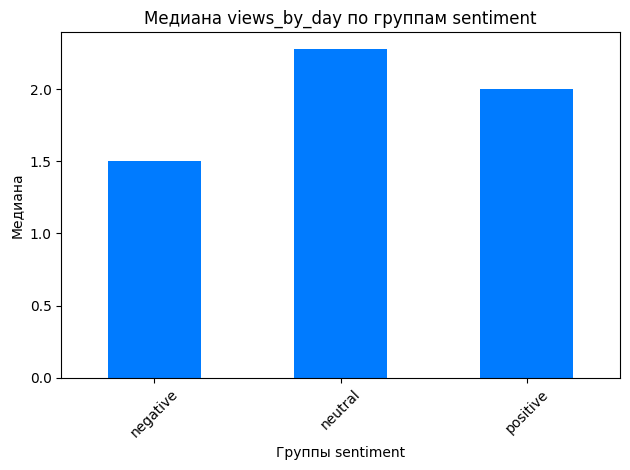

Группа positive: p-значение = 3.723633152375588e-115
Группа neutral: p-значение = 2.456656701807997e-142
Группа negative: p-значение = 3.492316981067643e-86
Отвергаем нулевую гипотезу: распределение ненормальное.
Используем тест Краскала-Уоллиса.

p-значение теста Краскала-Уоллиса: 7.6592518626352e-36
Существует статистически значимое различие между группами (отвергаем нулевую гипотезу).
Группа 1: negative, Группа 2: neutral, p-value: 4.598528419472082e-33, p-adj: 1.3795585258416247e-32, Отклонить нулевую гипотезу: True
Группа 1: negative, Группа 2: positive, p-value: 5.764694937406853e-14, p-adj: 1.7294084812220558e-13, Отклонить нулевую гипотезу: True
Группа 1: neutral, Группа 2: positive, p-value: 5.324131294497866e-10, p-adj: 1.5972393883493596e-09, Отклонить нулевую гипотезу: True


/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12573.
  res = hypotest_fun_out(*samples, **kwds)
/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 32975.
  res = hypotest_fun_out(*samples, **kwds)


In [153]:
check_reliability(df)

In [1]:
df_cats = df[df['category'] == 'Кошки']
df_dogs = df[df['category'] == 'Собаки']

NameError: name 'df' is not defined

sentiment_group
neutral     16604
positive     7833
negative     2777
Name: count, dtype: int64


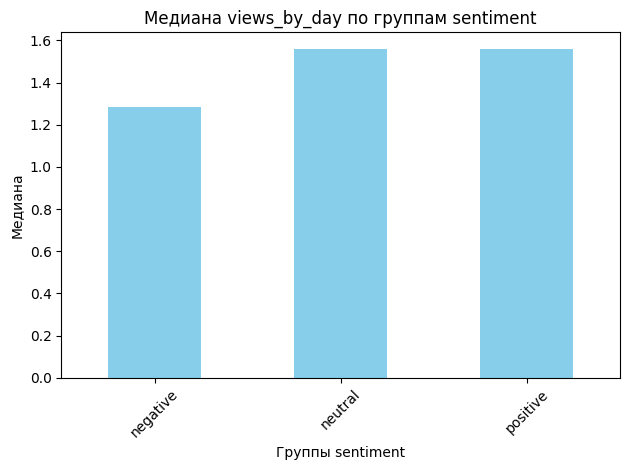

Группа positive: p-значение = 1.5798347766749513e-103
Группа neutral: p-значение = 1.0748231731073832e-123
Группа negative: p-значение = 1.1987879247586257e-75
Отвергаем нулевую гипотезу: распределение ненормальное.
Используем тест Краскала-Уоллиса.

p-значение теста Краскала-Уоллиса: 1.471877668448458e-08
Существует статистически значимое различие между группами (отвергаем нулевую гипотезу).
Группа 1: negative, Группа 2: neutral, p-value: 3.2475841242345268e-09, p-adj: 9.74275237270358e-09, Отклонить нулевую гипотезу: True
Группа 1: negative, Группа 2: positive, p-value: 1.070587111966613e-07, p-adj: 3.211761335899839e-07, Отклонить нулевую гипотезу: True
Группа 1: neutral, Группа 2: positive, p-value: 0.7263774573125182, p-adj: 1.0, Отклонить нулевую гипотезу: False


/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7833.
  res = hypotest_fun_out(*samples, **kwds)
/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 16604.
  res = hypotest_fun_out(*samples, **kwds)


In [142]:
check_reliability(df_cats)

sentiment_group
neutral     16371
positive     4740
negative     1648
Name: count, dtype: int64


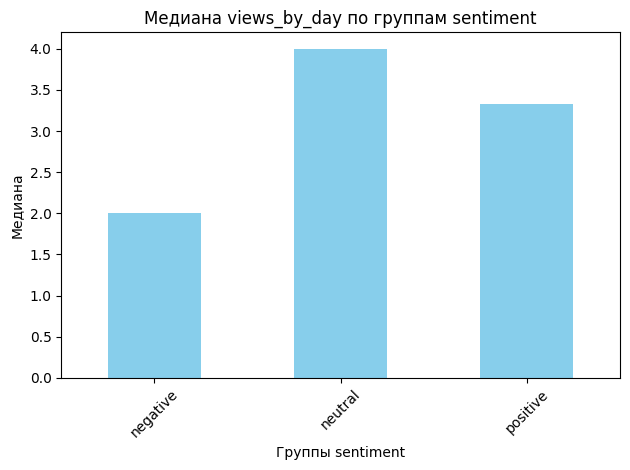

Группа positive: p-значение = 2.690389811383192e-86
Группа neutral: p-значение = 1.6828866380893805e-120
Группа negative: p-значение = 1.6205660704790116e-61
Отвергаем нулевую гипотезу: распределение ненормальное.
Используем тест Краскала-Уоллиса.

p-значение теста Краскала-Уоллиса: 2.6492073485981517e-14
Существует статистически значимое различие между группами (отвергаем нулевую гипотезу).
Группа 1: negative, Группа 2: neutral, p-value: 5.6534859788879575e-14, p-adj: 1.6960457936663871e-13, Отклонить нулевую гипотезу: True
Группа 1: negative, Группа 2: positive, p-value: 5.41517982586842e-07, p-adj: 1.624553947760526e-06, Отклонить нулевую гипотезу: True
Группа 1: neutral, Группа 2: positive, p-value: 0.0006603308445163164, p-adj: 0.001980992533548949, Отклонить нулевую гипотезу: True


/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 16371.
  res = hypotest_fun_out(*samples, **kwds)


In [143]:
check_reliability(df_dogs)

In [144]:
df_male = df[df['gender'] == 'М']
df_female = df[df['gender'] == 'Ж']

sentiment_group
neutral     16450
positive     6490
negative     1796
Name: count, dtype: int64


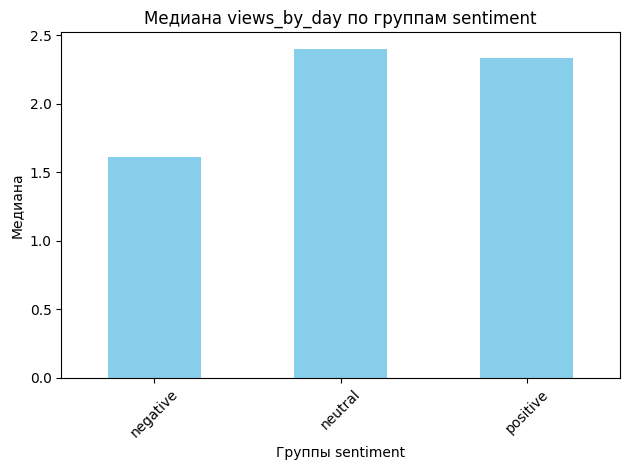

Группа positive: p-значение = 3.1535625911220124e-95
Группа neutral: p-значение = 7.915103461866103e-122
Группа negative: p-значение = 5.9716757307988306e-64
Отвергаем нулевую гипотезу: распределение ненормальное.
Используем тест Краскала-Уоллиса.

p-значение теста Краскала-Уоллиса: 2.5189666337222375e-14
Существует статистически значимое различие между группами (отвергаем нулевую гипотезу).
Группа 1: negative, Группа 2: neutral, p-value: 4.4613912139359334e-15, p-adj: 1.33841736418078e-14, Отклонить нулевую гипотезу: True
Группа 1: negative, Группа 2: positive, p-value: 1.702678408897846e-11, p-adj: 5.1080352266935387e-11, Отклонить нулевую гипотезу: True
Группа 1: neutral, Группа 2: positive, p-value: 0.13108811715507537, p-adj: 0.3932643514652261, Отклонить нулевую гипотезу: False


/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6490.
  res = hypotest_fun_out(*samples, **kwds)
/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 16450.
  res = hypotest_fun_out(*samples, **kwds)


In [145]:
check_reliability(df_male)

sentiment_group
neutral     16525
positive     6083
negative     2629
Name: count, dtype: int64


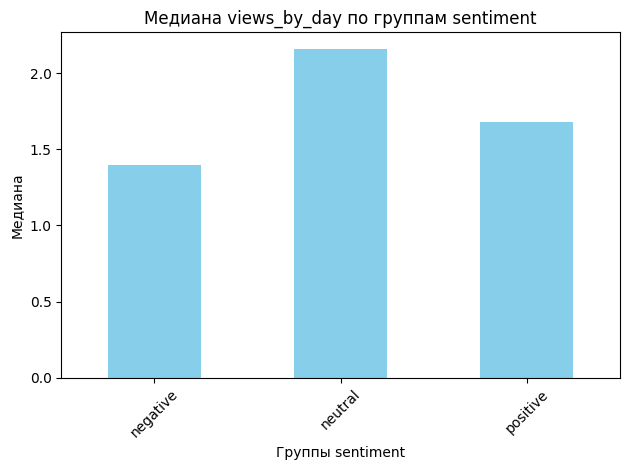

Группа positive: p-значение = 2.0503113725660695e-96
Группа neutral: p-значение = 2.903853907588569e-122
Группа negative: p-значение = 4.5691203377964934e-74
Отвергаем нулевую гипотезу: распределение ненормальное.
Используем тест Краскала-Уоллиса.

p-значение теста Краскала-Уоллиса: 2.369950800109783e-24
Существует статистически значимое различие между группами (отвергаем нулевую гипотезу).
Группа 1: negative, Группа 2: neutral, p-value: 1.4026112408413647e-17, p-adj: 4.2078337225240944e-17, Отклонить нулевую гипотезу: True
Группа 1: negative, Группа 2: positive, p-value: 0.0036833100266126942, p-adj: 0.011049930079838084, Отклонить нулевую гипотезу: True
Группа 1: neutral, Группа 2: positive, p-value: 5.6665726725790093e-14, p-adj: 1.6999718017737027e-13, Отклонить нулевую гипотезу: True


/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6083.
  res = hypotest_fun_out(*samples, **kwds)
/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 16525.
  res = hypotest_fun_out(*samples, **kwds)


In [146]:
check_reliability(df_female)

In [88]:
df['photo_count'].describe()

count    44714.000000
mean         3.715995
std          2.430481
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         10.000000
Name: photo_count, dtype: float64

In [147]:
df_less = df[df['photo_count'] < 4]
df_more = df[df['photo_count'] >= 4]

sentiment_group
neutral     18234
positive     7373
negative     2585
Name: count, dtype: int64


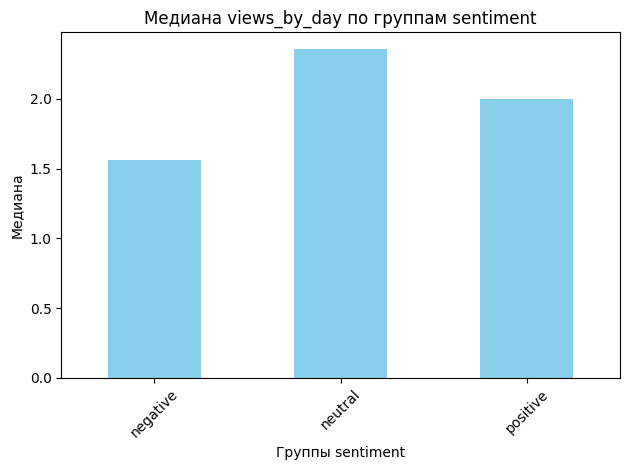

Группа positive: p-значение = 2.5767445656999314e-100
Группа neutral: p-значение = 8.140253756642602e-125
Группа negative: p-значение = 4.2365745575702246e-73
Отвергаем нулевую гипотезу: распределение ненормальное.
Используем тест Краскала-Уоллиса.

p-значение теста Краскала-Уоллиса: 6.295753873966068e-22
Существует статистически значимое различие между группами (отвергаем нулевую гипотезу).
Группа 1: negative, Группа 2: neutral, p-value: 7.737771113213711e-19, p-adj: 2.3213313339641136e-18, Отклонить нулевую гипотезу: True
Группа 1: negative, Группа 2: positive, p-value: 1.2202484462062821e-06, p-adj: 3.6607453386188464e-06, Отклонить нулевую гипотезу: True
Группа 1: neutral, Группа 2: positive, p-value: 4.323894162358618e-09, p-adj: 1.2971682487075854e-08, Отклонить нулевую гипотезу: True


/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7373.
  res = hypotest_fun_out(*samples, **kwds)
/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 18234.
  res = hypotest_fun_out(*samples, **kwds)


In [148]:
check_reliability(df_less)

sentiment_group
neutral     14741
positive     5200
negative     1840
Name: count, dtype: int64


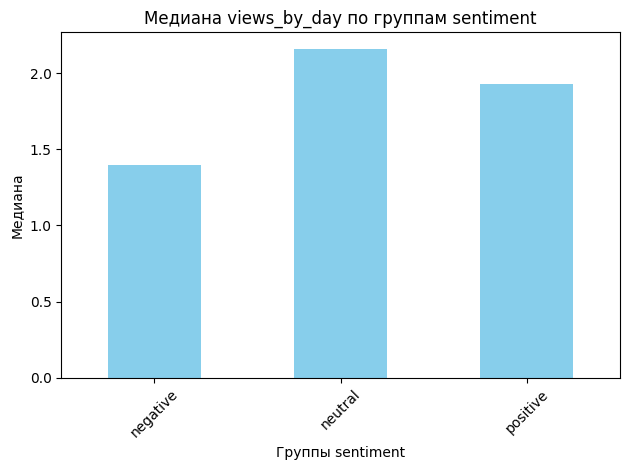

Группа positive: p-значение = 5.500055299372545e-91
Группа neutral: p-значение = 5.090008728750673e-119
Группа negative: p-значение = 1.7102737406556358e-65
Отвергаем нулевую гипотезу: распределение ненормальное.
Используем тест Краскала-Уоллиса.

p-значение теста Краскала-Уоллиса: 6.506120804575775e-16
Существует статистически значимое различие между группами (отвергаем нулевую гипотезу).
Группа 1: negative, Группа 2: neutral, p-value: 2.605713267244367e-16, p-adj: 7.817139801733101e-16, Отклонить нулевую гипотезу: True
Группа 1: negative, Группа 2: positive, p-value: 5.28915540125276e-09, p-adj: 1.586746620375828e-08, Отклонить нулевую гипотезу: True
Группа 1: neutral, Группа 2: positive, p-value: 0.0033952085674481265, p-adj: 0.010185625702344379, Отклонить нулевую гипотезу: True


/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5200.
  res = hypotest_fun_out(*samples, **kwds)
/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 14741.
  res = hypotest_fun_out(*samples, **kwds)


In [149]:
check_reliability(df_more)

In [167]:
df_cats_samez = df_cats[df_cats['gender'] == 'М']
df_cats_samka = df_cats[df_cats['gender'] == 'Ж']

In [171]:
df_dogs_samez = df_dogs[df_dogs['gender'] == 'М']
df_dogs_samka = df_dogs[df_dogs['gender'] == 'Ж']

sentiment_group
neutral     8022
positive    4003
negative     943
Name: count, dtype: int64


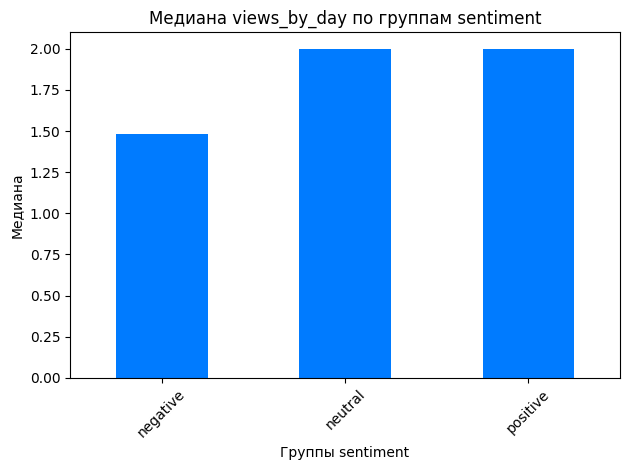

Группа positive: p-значение = 2.5440088762354725e-84
Группа neutral: p-значение = 1.0254957755689994e-101
Группа negative: p-значение = 4.875266310115366e-52
Отвергаем нулевую гипотезу: распределение ненормальное.
Используем тест Краскала-Уоллиса.

p-значение теста Краскала-Уоллиса: 5.10823678597908e-06
Существует статистически значимое различие между группами (отвергаем нулевую гипотезу).
Группа 1: negative, Группа 2: neutral, p-value: 1.1279400349455545e-06, p-adj: 3.3838201048366633e-06, Отклонить нулевую гипотезу: True
Группа 1: negative, Группа 2: positive, p-value: 5.18258737194068e-06, p-adj: 1.554776211582204e-05, Отклонить нулевую гипотезу: True
Группа 1: neutral, Группа 2: positive, p-value: 0.7895908078386241, p-adj: 1.0, Отклонить нулевую гипотезу: False


/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8022.
  res = hypotest_fun_out(*samples, **kwds)


In [173]:
check_reliability(df_cats_samez)

sentiment_group
neutral     8582
positive    3830
negative    1834
Name: count, dtype: int64


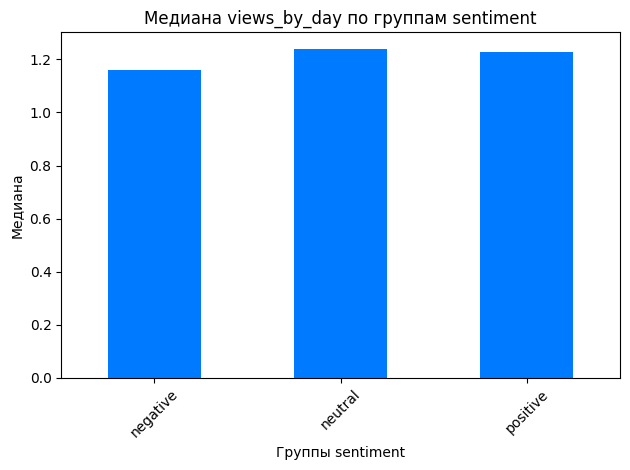

Группа positive: p-значение = 7.13514227289217e-86
Группа neutral: p-значение = 3.0289122024558917e-106
Группа negative: p-значение = 1.9842500245966205e-66
Отвергаем нулевую гипотезу: распределение ненормальное.
Используем тест Краскала-Уоллиса.

p-значение теста Краскала-Уоллиса: 0.23146531998438366
Нет статистически значимого различия между группами (не отвергаем нулевую гипотезу).
Группа 1: negative, Группа 2: neutral, p-value: 0.12357936199889127, p-adj: 0.3707380859966738, Отклонить нулевую гипотезу: False
Группа 1: negative, Группа 2: positive, p-value: 0.5218970174096624, p-adj: 1.0, Отклонить нулевую гипотезу: False
Группа 1: neutral, Группа 2: positive, p-value: 0.2769817639278983, p-adj: 0.8309452917836949, Отклонить нулевую гипотезу: False


/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8582.
  res = hypotest_fun_out(*samples, **kwds)


In [174]:
check_reliability(df_cats_samka)

sentiment_group
neutral     8428
positive    2487
negative     853
Name: count, dtype: int64


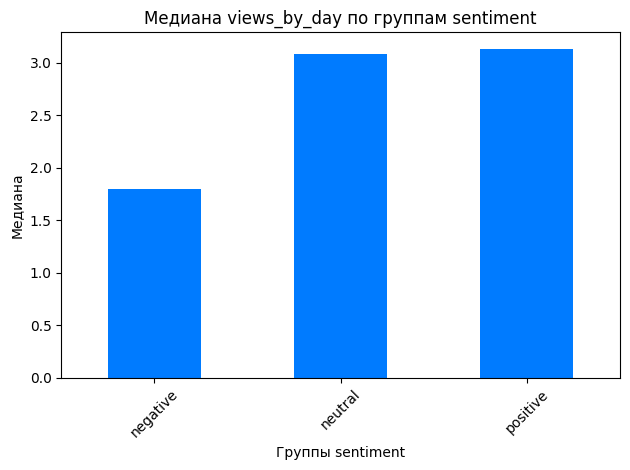

Группа positive: p-значение = 4.93071646046842e-69
Группа neutral: p-значение = 1.5171394947171975e-102
Группа negative: p-значение = 4.7098227454753803e-48
Отвергаем нулевую гипотезу: распределение ненормальное.
Используем тест Краскала-Уоллиса.

p-значение теста Краскала-Уоллиса: 1.6122263319261645e-08
Существует статистически значимое различие между группами (отвергаем нулевую гипотезу).
Группа 1: negative, Группа 2: neutral, p-value: 3.1466096122395285e-09, p-adj: 9.439828836718586e-09, Отклонить нулевую гипотезу: True
Группа 1: negative, Группа 2: positive, p-value: 7.765831214668627e-08, p-adj: 2.329749364400588e-07, Отклонить нулевую гипотезу: True
Группа 1: neutral, Группа 2: positive, p-value: 0.8880807882640921, p-adj: 1.0, Отклонить нулевую гипотезу: False


/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8428.
  res = hypotest_fun_out(*samples, **kwds)


In [175]:
check_reliability(df_dogs_samez)

sentiment_group
neutral     7943
positive    2253
negative     795
Name: count, dtype: int64


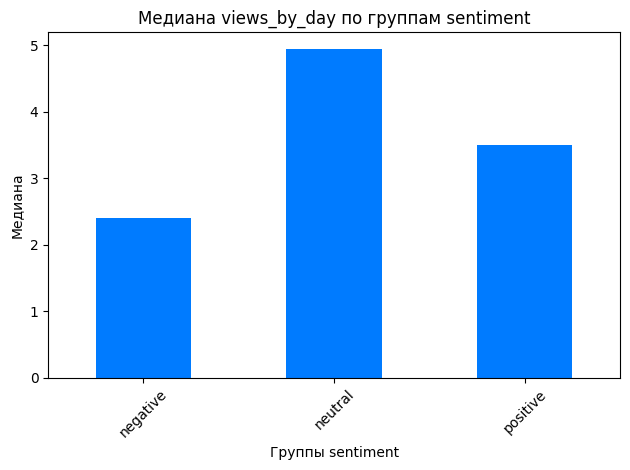

Группа positive: p-значение = 1.3084852000812441e-69
Группа neutral: p-значение = 1.5131721062689172e-99
Группа negative: p-значение = 2.596029843445056e-47
Отвергаем нулевую гипотезу: распределение ненормальное.
Используем тест Краскала-Уоллиса.

p-значение теста Краскала-Уоллиса: 3.492403011833567e-09
Существует статистически значимое различие между группами (отвергаем нулевую гипотезу).
Группа 1: negative, Группа 2: neutral, p-value: 2.5579107026850393e-06, p-adj: 7.673732108055117e-06, Отклонить нулевую гипотезу: True
Группа 1: negative, Группа 2: positive, p-value: 0.09131298916794173, p-adj: 0.2739389675038252, Отклонить нулевую гипотезу: False
Группа 1: neutral, Группа 2: positive, p-value: 2.4875303485170906e-06, p-adj: 7.462591045551272e-06, Отклонить нулевую гипотезу: True


/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7943.
  res = hypotest_fun_out(*samples, **kwds)


In [176]:
check_reliability(df_dogs_samka)

# После предзащиты

In [3]:
df = pd.read_excel('/Users/mac/Desktop/учеба/проект/avito_data_main.xlsx')
df

,item_id,category,days_active,has_video,photo_count,title,title_length,description_length,description_word_count,DescriptionRu,...,seller_count_reviews,seller_rating,page_views,page_views_by_day,contacts,favorites,conversion_page_views_contacts_%,conversion_page_views_favorites_%,conversion_page_views_favorites_contacts_%,sentiment
0,3883313327552309760,Кошки,25,False,2,"Отдам котиков, в хорошие руки 4 мес",35,8,1,Красавцы,...,NaN,NaN,106,4.240000,3,4,0.03,0.75,0.04,1.000000
1,3002289748139043840,Кошки,25,False,1,Бенгальская кошка,17,5,1,Супер,...,0.0,0.0,36,1.440000,0,0,0.00,NaN,0.00,0.999089
2,4649905965887619072,Кошки,11,False,5,Кот 3 года вислоухий,20,20,4,Кот красавец 3 года,...,1.0,1.0,5,0.454545,0,0,0.00,NaN,0.00,0.997077
3,5406398888000874496,Кошки,25,False,1,Сибирская кошка,15,16,3,Красавица в дом!,...,2.0,5.0,56,2.240000,1,1,0.02,1.00,0.02,0.997066
4,5841270525617292288,Кошки,25,False,4,Кошки мейн-кун,14,21,3,Хорошая милая кошечка,...,0.0,0.0,19,0.760000,0,0,0.00,NaN,0.00,0.995826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49968,6210833791942923264,Кошки,25,False,10,Шотландская вислоухая кошка,27,146,24,"Кошке 4 года, не стерилизованная, ни разу не к...",...,13.0,5.0,19,0.760000,1,1,0.05,1.00,0.05,-0.673896
49969,7914380850877753344,Кошки,25,False,2,Британская вислоухая,20,100,22,Девочка. Уже больше года. У ребенка оказалась ...,...,1.0,5.0,72,2.880000,1,3,0.01,0.33,0.04,-0.710234
49970,1007842829568802048,Кошки,2,False,4,Красивые здоровые кот и кошка 3 года,36,216,26,"Умерла хозяйка, бабушка, кошки никому не нужны...",...,23.0,5.0,33,16.500000,0,1,0.00,0.00,0.03,-0.714857
49971,6442878243383320576,Кошки,25,False,2,Кошка в дар бесплатно,21,50,11,без домная кошка мне 9 лет и мне очень жалко к...,...,0.0,0.0,19,0.760000,0,0,0.00,NaN,0.00,-0.876198


In [4]:
df['contacts'].describe()

count    49973.000000
mean         2.473316
std          7.505290
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        264.000000
Name: contacts, dtype: float64

In [5]:
df['favorites'].describe()

count    49973.000000
mean         7.054790
std         23.200624
min          0.000000
25%          0.000000
50%          1.000000
75%          6.000000
max       1406.000000
Name: favorites, dtype: float64

In [6]:
df.sort_values(by='contacts')

,item_id,category,days_active,has_video,photo_count,title,title_length,description_length,description_word_count,DescriptionRu,...,seller_count_reviews,seller_rating,page_views,page_views_by_day,contacts,favorites,conversion_page_views_contacts_%,conversion_page_views_favorites_%,conversion_page_views_favorites_contacts_%,sentiment
24986,6421307118941213696,Собаки,25,False,2,Щенок подросток ищет дом,24,476,78,"Щенок девочка возраст 4 мес.,Имя Кира \nОчень ...",...,11.0,5.0,10,0.400000,0,0,0.00,NaN,0.00,0.027281
24018,607833307088343424,Кошки,25,False,9,Кошки в добрые руки бесплатно,29,137,13,"Молодая кошечка подросток, \nВозраст: 8 месяце...",...,0.0,0.0,8,0.320000,0,1,0.00,0.00,0.12,0.034053
43930,4141320551170336768,Кошки,25,False,1,Найден кот,10,127,18,"Кот на вид 4-5 лет,не кастрат, очень многослов...",...,1.0,5.0,58,2.320000,0,2,0.00,0.00,0.03,-0.122391
24013,3750627298930655232,Кошки,15,False,1,Кошка тайская отдам в хорошие руки,34,50,9,Кошка Тайская 2 года девочка. Отдам в хорошие ...,...,0.0,0.0,10,0.666667,0,0,0.00,NaN,0.00,0.034057
24009,5943407928758989824,Собаки,22,False,2,Шпиц,4,35,7,Продаю шпица ( мальчик ) 11 месяцев,...,0.0,0.0,24,1.090909,0,0,0.00,NaN,0.00,0.034100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12448,4449068065111468032,Собаки,22,False,4,Шпиц,4,216,25,щеночки шпицули мальчики и одна айскрим окрас-...,...,6.0,4.2,6815,309.772727,217,255,0.03,0.85,0.04,0.151982
6654,1206257189116150016,Собаки,22,False,1,Померанский шпиц,16,242,4,"Мальчик, дата рождения 20.08.23\nИмеет полный ...",...,1.0,5.0,4256,193.454545,218,152,0.05,1.43,0.04,0.270685
41262,230161564684733184,Собаки,25,False,4,Отдам корги в добрые руки,25,2073,303,*ОБЪЯВЛЕНИЕ ПРИОСТАНОВЛЕНО*\n\nВозможно вы меч...,...,0.0,0.0,24336,973.440000,241,1308,0.01,0.18,0.05,-0.089558
5394,3481492398606014976,Кошки,22,False,3,Невский маскарадный малыш,25,342,41,"предлагаем невского маскарадного котенка, иаль...",...,5.0,5.0,5925,269.318182,262,408,0.04,0.64,0.07,0.312799


In [8]:
df[df['contacts'] == 0]

,item_id,category,days_active,has_video,photo_count,title,title_length,description_length,description_word_count,DescriptionRu,...,seller_count_reviews,seller_rating,page_views,page_views_by_day,contacts,favorites,conversion_page_views_contacts_%,conversion_page_views_favorites_%,conversion_page_views_favorites_contacts_%,sentiment
1,3002289748139043840,Кошки,25,False,1,Бенгальская кошка,17,5,1,Супер,...,0.0,0.0,36,1.440000,0,0,0.0,NaN,0.00,0.999089
2,4649905965887619072,Кошки,11,False,5,Кот 3 года вислоухий,20,20,4,Кот красавец 3 года,...,1.0,1.0,5,0.454545,0,0,0.0,NaN,0.00,0.997077
4,5841270525617292288,Кошки,25,False,4,Кошки мейн-кун,14,21,3,Хорошая милая кошечка,...,0.0,0.0,19,0.760000,0,0,0.0,NaN,0.00,0.995826
5,7715772058956853248,Кошки,8,False,1,Британская,10,12,2,крутой котик,...,0.0,0.0,5,0.625000,0,0,0.0,NaN,0.00,0.995245
7,6773733521540235264,Собаки,25,False,3,Полу хаски девочк 2месяца,25,27,4,Ласковая красавица ждёт вас,...,0.0,0.0,8,0.320000,0,1,0.0,0.0,0.12,0.994071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49963,5036599530784594944,Кошки,7,False,5,Кошка,5,225,30,"Симпатичная кошка ищет дом, уже 2 месяца живёт...",...,1.0,5.0,18,2.571429,0,1,0.0,0.0,0.06,-0.629927
49964,676365035345026304,Кошки,25,False,5,Кошка в добрые руки,19,165,27,"Кошку зовут Лиза, ей 3 года, крупная и пушиста...",...,4.0,5.0,7,0.280000,0,1,0.0,0.0,0.14,-0.632325
49966,1185653607705400064,Кошки,25,False,3,Кошка в дар,11,64,11,"Кошка осталась без хозяйки. 1,5 года. Жила все...",...,0.0,0.0,1,0.040000,0,0,0.0,NaN,0.00,-0.650716
49970,1007842829568802048,Кошки,2,False,4,Красивые здоровые кот и кошка 3 года,36,216,26,"Умерла хозяйка, бабушка, кошки никому не нужны...",...,23.0,5.0,33,16.500000,0,1,0.0,0.0,0.03,-0.714857


In [9]:
df[df['favorites'] == 0]

,item_id,category,days_active,has_video,photo_count,title,title_length,description_length,description_word_count,DescriptionRu,...,seller_count_reviews,seller_rating,page_views,page_views_by_day,contacts,favorites,conversion_page_views_contacts_%,conversion_page_views_favorites_%,conversion_page_views_favorites_contacts_%,sentiment
1,3002289748139043840,Кошки,25,False,1,Бенгальская кошка,17,5,1,Супер,...,0.0,0.0,36,1.440000,0,0,0.00,NaN,0.0,0.999089
2,4649905965887619072,Кошки,11,False,5,Кот 3 года вислоухий,20,20,4,Кот красавец 3 года,...,1.0,1.0,5,0.454545,0,0,0.00,NaN,0.0,0.997077
4,5841270525617292288,Кошки,25,False,4,Кошки мейн-кун,14,21,3,Хорошая милая кошечка,...,0.0,0.0,19,0.760000,0,0,0.00,NaN,0.0,0.995826
5,7715772058956853248,Кошки,8,False,1,Британская,10,12,2,крутой котик,...,0.0,0.0,5,0.625000,0,0,0.00,NaN,0.0,0.995245
6,2102965900885527040,Кошки,25,False,5,Котёнок девочка 4 мес,21,14,2,Красивый окрас,...,5.0,4.8,12,0.480000,1,0,0.08,inf,0.0,0.994940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49955,8562541714741035008,Собаки,24,False,6,Кора,4,1626,248,Преданная душа... жизнь... вся жизнь переверну...,...,37.0,4.8,6,0.250000,0,0,0.00,NaN,0.0,-0.572634
49958,5367349599317171200,Кошки,15,False,1,Кошка 1 год,11,95,15,"Кошечка 1 год,хозяйка умерла,люди просят прист...",...,1.0,5.0,7,0.466667,0,0,0.00,NaN,0.0,-0.589394
49960,8259477629547160576,Кошки,25,False,1,Вислоухая кошка,15,102,15,"Стеша. 3 года. ""Мягкие лапки"". Любит одиночест...",...,0.0,0.0,16,0.640000,1,0,0.06,inf,0.0,-0.603929
49966,1185653607705400064,Кошки,25,False,3,Кошка в дар,11,64,11,"Кошка осталась без хозяйки. 1,5 года. Жила все...",...,0.0,0.0,1,0.040000,0,0,0.00,NaN,0.0,-0.650716


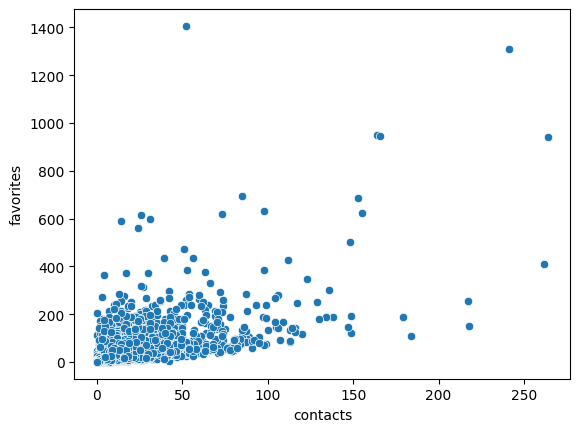

In [10]:
sns.scatterplot(x='contacts', y='favorites', data=df)


plt.show()

In [11]:
df['contacts'].corr(df['favorites'])

np.float64(0.7117202384195377)

In [12]:
df['activity'] = df['favorites'] + df['contacts']

In [13]:
df

,item_id,category,days_active,has_video,photo_count,title,title_length,description_length,description_word_count,DescriptionRu,...,seller_rating,page_views,page_views_by_day,contacts,favorites,conversion_page_views_contacts_%,conversion_page_views_favorites_%,conversion_page_views_favorites_contacts_%,sentiment,activity
0,3883313327552309760,Кошки,25,False,2,"Отдам котиков, в хорошие руки 4 мес",35,8,1,Красавцы,...,NaN,106,4.240000,3,4,0.03,0.75,0.04,1.000000,7
1,3002289748139043840,Кошки,25,False,1,Бенгальская кошка,17,5,1,Супер,...,0.0,36,1.440000,0,0,0.00,NaN,0.00,0.999089,0
2,4649905965887619072,Кошки,11,False,5,Кот 3 года вислоухий,20,20,4,Кот красавец 3 года,...,1.0,5,0.454545,0,0,0.00,NaN,0.00,0.997077,0
3,5406398888000874496,Кошки,25,False,1,Сибирская кошка,15,16,3,Красавица в дом!,...,5.0,56,2.240000,1,1,0.02,1.00,0.02,0.997066,2
4,5841270525617292288,Кошки,25,False,4,Кошки мейн-кун,14,21,3,Хорошая милая кошечка,...,0.0,19,0.760000,0,0,0.00,NaN,0.00,0.995826,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49968,6210833791942923264,Кошки,25,False,10,Шотландская вислоухая кошка,27,146,24,"Кошке 4 года, не стерилизованная, ни разу не к...",...,5.0,19,0.760000,1,1,0.05,1.00,0.05,-0.673896,2
49969,7914380850877753344,Кошки,25,False,2,Британская вислоухая,20,100,22,Девочка. Уже больше года. У ребенка оказалась ...,...,5.0,72,2.880000,1,3,0.01,0.33,0.04,-0.710234,4
49970,1007842829568802048,Кошки,2,False,4,Красивые здоровые кот и кошка 3 года,36,216,26,"Умерла хозяйка, бабушка, кошки никому не нужны...",...,5.0,33,16.500000,0,1,0.00,0.00,0.03,-0.714857,1
49971,6442878243383320576,Кошки,25,False,2,Кошка в дар бесплатно,21,50,11,без домная кошка мне 9 лет и мне очень жалко к...,...,0.0,19,0.760000,0,0,0.00,NaN,0.00,-0.876198,0


In [14]:
df['activity'].describe()

count    49973.000000
mean         9.528105
std         29.025133
min          0.000000
25%          0.000000
50%          2.000000
75%          8.000000
max       1549.000000
Name: activity, dtype: float64

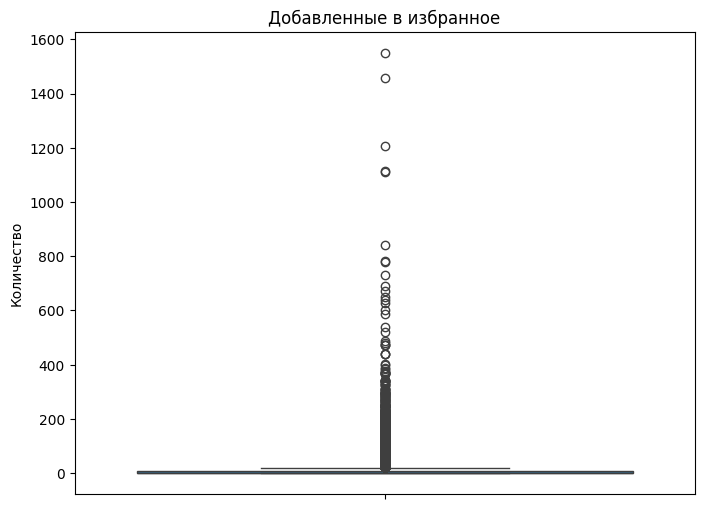

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['activity'])
plt.title('Добавленные в избранное')
plt.ylabel('Количество')
plt.show()

In [18]:
outlier(df, 'activity')

,item_id,category,days_active,has_video,photo_count,title,title_length,description_length,description_word_count,DescriptionRu,...,seller_rating,page_views,page_views_by_day,contacts,favorites,conversion_page_views_contacts_%,conversion_page_views_favorites_%,conversion_page_views_favorites_contacts_%,sentiment,activity
0,3883313327552309760,Кошки,25,False,2,"Отдам котиков, в хорошие руки 4 мес",35,8,1,Красавцы,...,NaN,106,4.240000,3,4,0.03,0.75,0.04,1.000000,7
1,3002289748139043840,Кошки,25,False,1,Бенгальская кошка,17,5,1,Супер,...,0.0,36,1.440000,0,0,0.00,NaN,0.00,0.999089,0
2,4649905965887619072,Кошки,11,False,5,Кот 3 года вислоухий,20,20,4,Кот красавец 3 года,...,1.0,5,0.454545,0,0,0.00,NaN,0.00,0.997077,0
3,5406398888000874496,Кошки,25,False,1,Сибирская кошка,15,16,3,Красавица в дом!,...,5.0,56,2.240000,1,1,0.02,1.00,0.02,0.997066,2
4,5841270525617292288,Кошки,25,False,4,Кошки мейн-кун,14,21,3,Хорошая милая кошечка,...,0.0,19,0.760000,0,0,0.00,NaN,0.00,0.995826,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49968,6210833791942923264,Кошки,25,False,10,Шотландская вислоухая кошка,27,146,24,"Кошке 4 года, не стерилизованная, ни разу не к...",...,5.0,19,0.760000,1,1,0.05,1.00,0.05,-0.673896,2
49969,7914380850877753344,Кошки,25,False,2,Британская вислоухая,20,100,22,Девочка. Уже больше года. У ребенка оказалась ...,...,5.0,72,2.880000,1,3,0.01,0.33,0.04,-0.710234,4
49970,1007842829568802048,Кошки,2,False,4,Красивые здоровые кот и кошка 3 года,36,216,26,"Умерла хозяйка, бабушка, кошки никому не нужны...",...,5.0,33,16.500000,0,1,0.00,0.00,0.03,-0.714857,1
49971,6442878243383320576,Кошки,25,False,2,Кошка в дар бесплатно,21,50,11,без домная кошка мне 9 лет и мне очень жалко к...,...,0.0,19,0.760000,0,0,0.00,NaN,0.00,-0.876198,0


In [77]:
df['contacts'].describe()

count    49973.000000
mean         2.473316
std          7.505290
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        264.000000
Name: contacts, dtype: float64

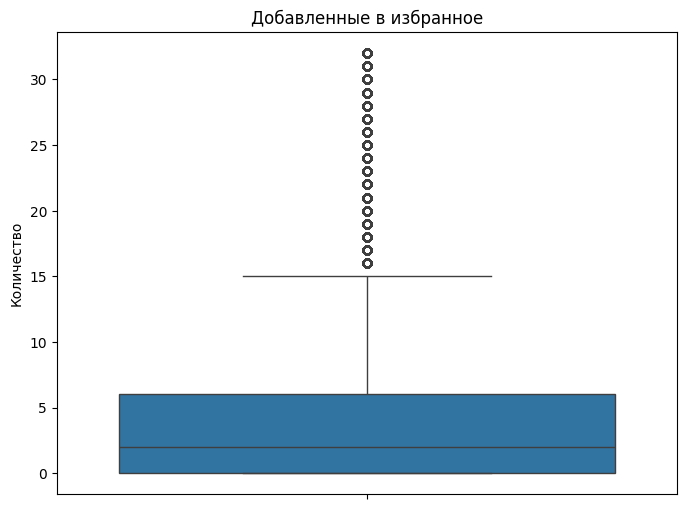

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['activity'])
plt.title('Добавленные в избранное')
plt.ylabel('Количество')
plt.show()

In [20]:
df = pd.read_excel('/Users/mac/Desktop/учеба/проект/avito_data_main.xlsx')
df

,item_id,category,days_active,has_video,photo_count,title,title_length,description_length,description_word_count,DescriptionRu,...,seller_count_reviews,seller_rating,page_views,page_views_by_day,contacts,favorites,conversion_page_views_contacts_%,conversion_page_views_favorites_%,conversion_page_views_favorites_contacts_%,sentiment
0,3883313327552309760,Кошки,25,False,2,"Отдам котиков, в хорошие руки 4 мес",35,8,1,Красавцы,...,NaN,NaN,106,4.240000,3,4,0.03,0.75,0.04,1.000000
1,3002289748139043840,Кошки,25,False,1,Бенгальская кошка,17,5,1,Супер,...,0.0,0.0,36,1.440000,0,0,0.00,NaN,0.00,0.999089
2,4649905965887619072,Кошки,11,False,5,Кот 3 года вислоухий,20,20,4,Кот красавец 3 года,...,1.0,1.0,5,0.454545,0,0,0.00,NaN,0.00,0.997077
3,5406398888000874496,Кошки,25,False,1,Сибирская кошка,15,16,3,Красавица в дом!,...,2.0,5.0,56,2.240000,1,1,0.02,1.00,0.02,0.997066
4,5841270525617292288,Кошки,25,False,4,Кошки мейн-кун,14,21,3,Хорошая милая кошечка,...,0.0,0.0,19,0.760000,0,0,0.00,NaN,0.00,0.995826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49968,6210833791942923264,Кошки,25,False,10,Шотландская вислоухая кошка,27,146,24,"Кошке 4 года, не стерилизованная, ни разу не к...",...,13.0,5.0,19,0.760000,1,1,0.05,1.00,0.05,-0.673896
49969,7914380850877753344,Кошки,25,False,2,Британская вислоухая,20,100,22,Девочка. Уже больше года. У ребенка оказалась ...,...,1.0,5.0,72,2.880000,1,3,0.01,0.33,0.04,-0.710234
49970,1007842829568802048,Кошки,2,False,4,Красивые здоровые кот и кошка 3 года,36,216,26,"Умерла хозяйка, бабушка, кошки никому не нужны...",...,23.0,5.0,33,16.500000,0,1,0.00,0.00,0.03,-0.714857
49971,6442878243383320576,Кошки,25,False,2,Кошка в дар бесплатно,21,50,11,без домная кошка мне 9 лет и мне очень жалко к...,...,0.0,0.0,19,0.760000,0,0,0.00,NaN,0.00,-0.876198


In [41]:
df = pd.read_excel('/Users/mac/Desktop/учеба/проект/avito_data_main.xlsx')

In [42]:
df['activity'] = (df['favorites'] + df['contacts']) / df['days_active']

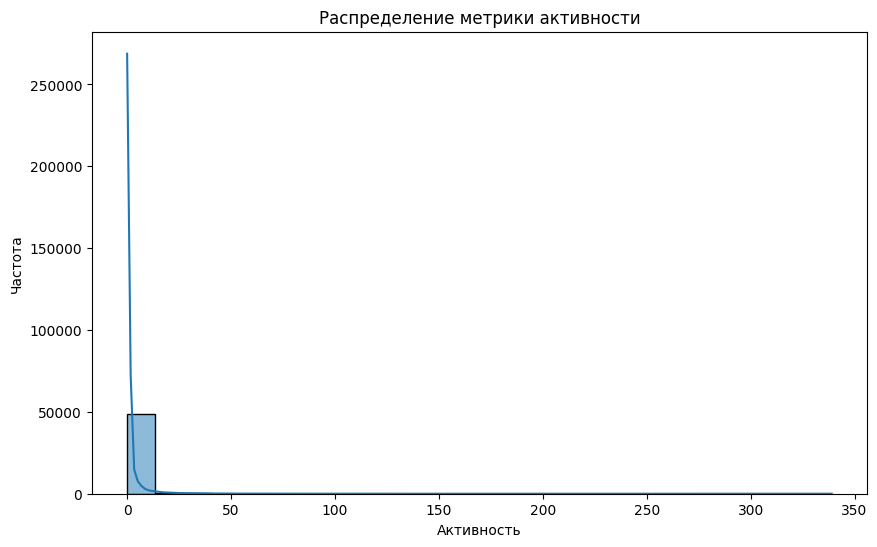

In [43]:
plt.figure(figsize=(10, 6))
sns.histplot(df['activity'], kde=True, bins=25)
plt.title('Распределение метрики активности')
plt.xlabel('Активность')
plt.ylabel('Частота')
plt.show()

In [45]:
df.tail(10)

,item_id,category,days_active,has_video,photo_count,title,title_length,description_length,description_word_count,DescriptionRu,...,seller_rating,page_views,page_views_by_day,contacts,favorites,conversion_page_views_contacts_%,conversion_page_views_favorites_%,conversion_page_views_favorites_contacts_%,sentiment,activity
49963,5036599530784594944,Кошки,7,False,5,Кошка,5,225,30,"Симпатичная кошка ищет дом, уже 2 месяца живёт...",...,5.0,18,2.571429,0,1,0.00,0.00,0.06,-0.629927,0.142857
49964,676365035345026304,Кошки,25,False,5,Кошка в добрые руки,19,165,27,"Кошку зовут Лиза, ей 3 года, крупная и пушиста...",...,5.0,7,0.280000,0,1,0.00,0.00,0.14,-0.632325,0.040000
49965,1702187313964465920,Кошки,1,False,2,Сибирская,9,143,19,"Найдена кошка. Чистый, домашний, стерилозован....",...,0.0,196,196.000000,4,21,0.02,0.19,0.11,-0.637291,25.000000
49966,1185653607705400064,Кошки,25,False,3,Кошка в дар,11,64,11,"Кошка осталась без хозяйки. 1,5 года. Жила все...",...,0.0,1,0.040000,0,0,0.00,NaN,0.00,-0.650716,0.000000
49967,8521482419013598208,Кошки,25,False,1,Шотландская,11,98,14,"Кот. Не кастрированный, в связи с частыми длит...",...,5.0,19,0.760000,1,1,0.05,1.00,0.05,-0.650743,0.080000
49968,6210833791942923264,Кошки,25,False,10,Шотландская вислоухая кошка,27,146,24,"Кошке 4 года, не стерилизованная, ни разу не к...",...,5.0,19,0.760000,1,1,0.05,1.00,0.05,-0.673896,0.080000
49969,7914380850877753344,Кошки,25,False,2,Британская вислоухая,20,100,22,Девочка. Уже больше года. У ребенка оказалась ...,...,5.0,72,2.880000,1,3,0.01,0.33,0.04,-0.710234,0.160000
49970,1007842829568802048,Кошки,2,False,4,Красивые здоровые кот и кошка 3 года,36,216,26,"Умерла хозяйка, бабушка, кошки никому не нужны...",...,5.0,33,16.500000,0,1,0.00,0.00,0.03,-0.714857,0.500000
49971,6442878243383320576,Кошки,25,False,2,Кошка в дар бесплатно,21,50,11,без домная кошка мне 9 лет и мне очень жалко к...,...,0.0,19,0.760000,0,0,0.00,NaN,0.00,-0.876198,0.000000
49972,5940081728543144960,Кошки,5,False,4,Кот 2 года ко всему приучен,27,22,4,Кот не пакостит совсем,...,5.0,270,54.000000,5,20,0.02,0.25,0.07,-0.894136,5.000000


In [47]:
df.columns

Index(['item_id', 'category', 'days_active', 'has_video', 'photo_count',
       'title', 'title_length', 'description_length', 'description_word_count',
       'DescriptionRu', 'breed', 'gender', 'age', 'price', 'seller_n_month',
       'seller_count_reviews', 'seller_rating', 'page_views',
       'page_views_by_day', 'contacts', 'favorites',
       'conversion_page_views_contacts_%', 'conversion_page_views_favorites_%',
       'conversion_page_views_favorites_contacts_%', 'sentiment', 'activity'],
      dtype='object')

In [48]:
df = df[['category', 'days_active', 'has_video', 'photo_count', 'title', 'title_length', 'description_length', 'description_word_count', 'DescriptionRu', 'breed', 'gender', 'age', 'price', 'contacts', 'favorites', 'activity', 'sentiment']]

In [49]:
df

,category,days_active,has_video,photo_count,title,title_length,description_length,description_word_count,DescriptionRu,breed,gender,age,price,contacts,favorites,activity,sentiment
0,Кошки,25,False,2,"Отдам котиков, в хорошие руки 4 мес",35,8,1,Красавцы,NaN,М,4.0,5,3,4,0.28,1.000000
1,Кошки,25,False,1,Бенгальская кошка,17,5,1,Супер,Бенгальская,Ж,NaN,655,0,0,0.00,0.999089
2,Кошки,11,False,5,Кот 3 года вислоухий,20,20,4,Кот красавец 3 года,NaN,М,36.0,0,0,0,0.00,0.997077
3,Кошки,25,False,1,Сибирская кошка,15,16,3,Красавица в дом!,Сибирская,Ж,NaN,-1,1,1,0.08,0.997066
4,Кошки,25,False,4,Кошки мейн-кун,14,21,3,Хорошая милая кошечка,Мейн-кун,Ж,NaN,8000,0,0,0.00,0.995826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49968,Кошки,25,False,10,Шотландская вислоухая кошка,27,146,24,"Кошке 4 года, не стерилизованная, ни разу не к...",Шотландская,Ж,48.0,3000,1,1,0.08,-0.673896
49969,Кошки,25,False,2,Британская вислоухая,20,100,22,Девочка. Уже больше года. У ребенка оказалась ...,Британская,Ж,NaN,1500,1,3,0.16,-0.710234
49970,Кошки,2,False,4,Красивые здоровые кот и кошка 3 года,36,216,26,"Умерла хозяйка, бабушка, кошки никому не нужны...",NaN,Ж,36.0,0,0,1,0.50,-0.714857
49971,Кошки,25,False,2,Кошка в дар бесплатно,21,50,11,без домная кошка мне 9 лет и мне очень жалко к...,NaN,Ж,108.0,0,0,0,0.00,-0.876198


In [50]:
def classify(score):
    if score <= -0.2627573333333334:
        return 'negative'
    elif score > -0.2627573333333334 and score < 0.36862133333333325:
        return 'neutral'
    return 'positive'

In [51]:
df['sentiment_group'] = df['sentiment'].apply(classify)

In [52]:
df

,category,days_active,has_video,photo_count,title,title_length,description_length,description_word_count,DescriptionRu,breed,gender,age,price,contacts,favorites,activity,sentiment,sentiment_group
0,Кошки,25,False,2,"Отдам котиков, в хорошие руки 4 мес",35,8,1,Красавцы,NaN,М,4.0,5,3,4,0.28,1.000000,positive
1,Кошки,25,False,1,Бенгальская кошка,17,5,1,Супер,Бенгальская,Ж,NaN,655,0,0,0.00,0.999089,positive
2,Кошки,11,False,5,Кот 3 года вислоухий,20,20,4,Кот красавец 3 года,NaN,М,36.0,0,0,0,0.00,0.997077,positive
3,Кошки,25,False,1,Сибирская кошка,15,16,3,Красавица в дом!,Сибирская,Ж,NaN,-1,1,1,0.08,0.997066,positive
4,Кошки,25,False,4,Кошки мейн-кун,14,21,3,Хорошая милая кошечка,Мейн-кун,Ж,NaN,8000,0,0,0.00,0.995826,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49968,Кошки,25,False,10,Шотландская вислоухая кошка,27,146,24,"Кошке 4 года, не стерилизованная, ни разу не к...",Шотландская,Ж,48.0,3000,1,1,0.08,-0.673896,negative
49969,Кошки,25,False,2,Британская вислоухая,20,100,22,Девочка. Уже больше года. У ребенка оказалась ...,Британская,Ж,NaN,1500,1,3,0.16,-0.710234,negative
49970,Кошки,2,False,4,Красивые здоровые кот и кошка 3 года,36,216,26,"Умерла хозяйка, бабушка, кошки никому не нужны...",NaN,Ж,36.0,0,0,1,0.50,-0.714857,negative
49971,Кошки,25,False,2,Кошка в дар бесплатно,21,50,11,без домная кошка мне 9 лет и мне очень жалко к...,NaN,Ж,108.0,0,0,0,0.00,-0.876198,negative


In [89]:
df['activity'] = 3 * df['contacts'] + df['favorites']
df

,category,days_active,has_video,photo_count,title,title_length,description_length,description_word_count,DescriptionRu,breed,gender,age,price,contacts,favorites,activity,sentiment,sentiment_group
0,Кошки,25,False,2,"Отдам котиков, в хорошие руки 4 мес",35,8,1,Красавцы,NaN,М,4.0,5,3,4,13,1.000000,positive
1,Кошки,25,False,1,Бенгальская кошка,17,5,1,Супер,Бенгальская,Ж,NaN,655,0,0,0,0.999089,positive
2,Кошки,11,False,5,Кот 3 года вислоухий,20,20,4,Кот красавец 3 года,NaN,М,36.0,0,0,0,0,0.997077,positive
3,Кошки,25,False,1,Сибирская кошка,15,16,3,Красавица в дом!,Сибирская,Ж,NaN,-1,1,1,4,0.997066,positive
4,Кошки,25,False,4,Кошки мейн-кун,14,21,3,Хорошая милая кошечка,Мейн-кун,Ж,NaN,8000,0,0,0,0.995826,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49968,Кошки,25,False,10,Шотландская вислоухая кошка,27,146,24,"Кошке 4 года, не стерилизованная, ни разу не к...",Шотландская,Ж,48.0,3000,1,1,4,-0.673896,negative
49969,Кошки,25,False,2,Британская вислоухая,20,100,22,Девочка. Уже больше года. У ребенка оказалась ...,Британская,Ж,NaN,1500,1,3,6,-0.710234,negative
49970,Кошки,2,False,4,Красивые здоровые кот и кошка 3 года,36,216,26,"Умерла хозяйка, бабушка, кошки никому не нужны...",NaN,Ж,36.0,0,0,1,1,-0.714857,negative
49971,Кошки,25,False,2,Кошка в дар бесплатно,21,50,11,без домная кошка мне 9 лет и мне очень жалко к...,NaN,Ж,108.0,0,0,0,0,-0.876198,negative


In [91]:
df['activity'].describe()

count    49973.000000
mean        14.474736
std         42.294366
min          0.000000
25%          0.000000
50%          3.000000
75%         12.000000
max       2031.000000
Name: activity, dtype: float64

In [54]:
df['sentiment_group'].value_counts()

sentiment_group
neutral     44776
positive     4072
negative     1125
Name: count, dtype: int64

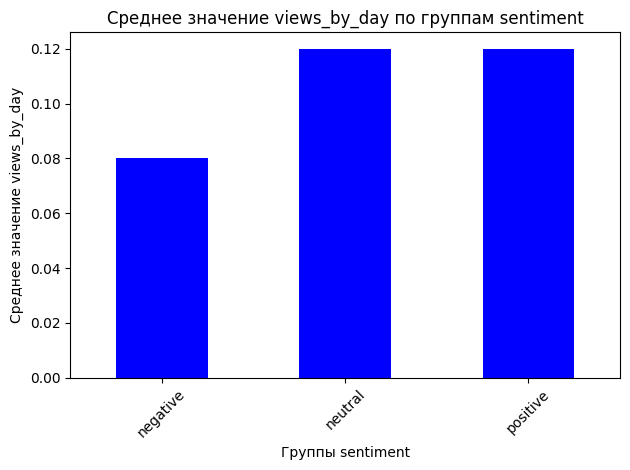

In [58]:
mean_views = df.groupby('sentiment_group')['activity'].median().reindex([
 'negative', 'neutral', 'positive'
])

mean_views.plot(kind='bar', color='blue')
plt.title('Среднее значение views_by_day по группам sentiment')
plt.xlabel('Группы sentiment')
plt.ylabel('Среднее значение views_by_day')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
import scipy.stats as stats
from scipy.stats import kruskal, mannwhitneyu
from statsmodels.stats.multitest import multipletests

In [ ]:
def check_reliability(df):
    print(df['sentiment_group'].value_counts())
    mean_views = df.groupby('sentiment_group')['activity'].median().reindex([
    'negative', 'neutral', 'positive'
    ])

    
    mean_views.plot(kind='bar', color='#007BFF')
    plt.title('Активность по группам sentiment')
    plt.xlabel('Группы sentiment')
    plt.ylabel('Медиана')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    for group in df['sentiment_group'].unique():
        stat, p_value = stats.shapiro(df[df['sentiment_group'] == group]['activity'])
        print(f'Группа {group}: p-значение = {p_value}')

    if p_value > 0.05:
        print('Не отвергаем нулевую гипотезу: распределение нормальное.')
    else:
        print('Отвергаем нулевую гипотезу: распределение ненормальное.')

    normal_distribution = all([
    stats.shapiro(df[df['sentiment_group'] == group]['activity'])[1] > 0.05 
    for group in df['sentiment_group'].unique()
    ])

    if normal_distribution:
        print('Используем ANOVA.')
        anova_result = stats.f_oneway(
            df[df['sentiment_group'] == 'negative']['activity'],
            df[df['sentiment_group'] == 'neutral']['activity'],
            df[df['sentiment_group'] == 'positive']['activity']
        )
        print('p-значение ANOVA:', anova_result.pvalue)
    else:
        print('Используем тест Краскала-Уоллиса.')
        kruskal_result = stats.kruskal(
            df[df['sentiment_group'] == 'negative']['activity'],
            df[df['sentiment_group'] == 'neutral']['activity'],
            df[df['sentiment_group'] == 'positive']['activity']
        )
        print()
        print('p-значение теста Краскала-Уоллиса:', kruskal_result.pvalue)
        

    alpha = 0.05

    if 'anova_result' in locals():
        if anova_result.pvalue < alpha:
            print('Существует статистически значимое различие между группами (отвергаем нулевую гипотезу).')
        else:
            print('Нет статистически значимого различия между группами (не отвергаем нулевую гипотезу).')

    if 'kruskal_result' in locals():
        if kruskal_result.pvalue < alpha:
            print('Существует статистически значимое различие между группами (отвергаем нулевую гипотезу).')
        else:
            print('Нет статистически значимого различия между группами (не отвергаем нулевую гипотезу).')

    pairs = [('negative', 'neutral'), ('negative', 'positive'), ('neutral', 'positive')]
    results = []

    for group1, group2 in pairs:
        stat, p = mannwhitneyu(df[df['sentiment_group'] == group1]['activity'], df[df['sentiment_group'] == group2]['activity'])
        results.append({'group1': group1, 'group2': group2, 'p-value': p})

    p_values = [result['p-value'] for result in results]
    adjusted_p = multipletests(p_values, method='bonferroni')[1]

    for i, result in enumerate(results):
        result['p-adj'] = adjusted_p[i]
        result['reject'] = result['p-adj'] < alpha
        print(f"Группа 1: {result['group1']}, Группа 2: {result['group2']}, "
          f"p-value: {result['p-value']}, p-adj: {result['p-adj']}, "
          f"Отклонить нулевую гипотезу: {result['reject']}")

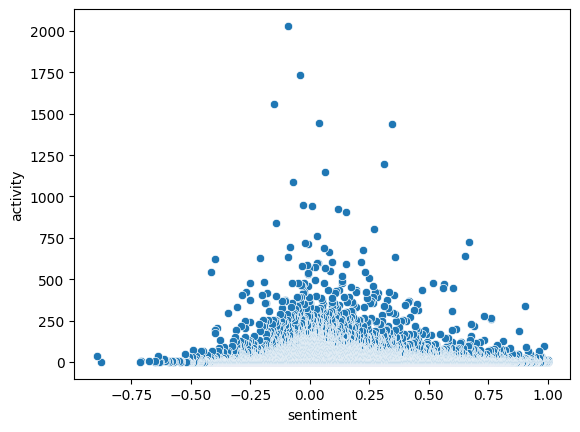

In [22]:
sns.scatterplot(x='sentiment', y='activity', data=df)


plt.show()

sentiment_group
neutral     44776
positive     4072
negative     1125
Name: count, dtype: int64


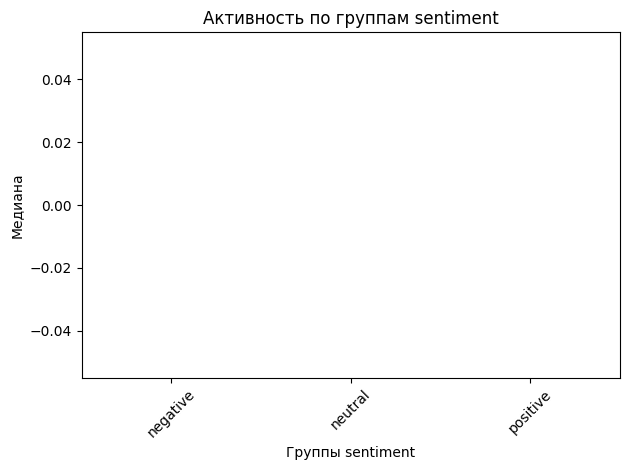

Группа positive: p-значение = 1.7832492958705656e-82
Группа neutral: p-значение = 8.071813104218435e-148
Группа negative: p-значение = 9.973387775093126e-55
Отвергаем нулевую гипотезу: распределение ненормальное.
Используем тест Краскала-Уоллиса.

p-значение теста Краскала-Уоллиса: 7.006693804289265e-13
Существует статистически значимое различие между группами (отвергаем нулевую гипотезу).
Группа 1: negative, Группа 2: neutral, p-value: 9.556415448698568e-14, p-adj: 2.8669246346095705e-13, Отклонить нулевую гипотезу: True
Группа 1: negative, Группа 2: positive, p-value: 1.3214347700414012e-10, p-adj: 3.9643043101242037e-10, Отклонить нулевую гипотезу: True
Группа 1: neutral, Группа 2: positive, p-value: 0.3513875440448665, p-adj: 1.0, Отклонить нулевую гипотезу: False


/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 44776.
  res = hypotest_fun_out(*samples, **kwds)


In [87]:
check_reliability(df)

In [74]:
delta = abs(df['sentiment'].min()) + df['sentiment'].max()

delta

np.float64(1.894135704569635)

In [75]:
deltar = 1.894135704569635 / 5

In [5]:
df

,category,days_active,has_video,photo_count,title,title_length,description_length,description_word_count,DescriptionRu,breed,...,seller_count_reviews,seller_rating,page_views,page_views_by_day,contacts,favorites,conversion_page_views_contacts_%,conversion_page_views_favorites_%,conversion_page_views_favorites_contacts_%,sentiment
0,Кошки,25,False,2,"Отдам котиков, в хорошие руки 4 мес",35,8,1,Красавцы,NaN,...,NaN,NaN,106,4.240000,3,4,0.03,0.75,0.04,1.000000
1,Кошки,25,False,1,Бенгальская кошка,17,5,1,Супер,Бенгальская,...,0.0,0.0,36,1.440000,0,0,0.00,NaN,0.00,0.999089
2,Кошки,11,False,5,Кот 3 года вислоухий,20,20,4,Кот красавец 3 года,NaN,...,1.0,1.0,5,0.454545,0,0,0.00,NaN,0.00,0.997077
3,Кошки,25,False,1,Сибирская кошка,15,16,3,Красавица в дом!,Сибирская,...,2.0,5.0,56,2.240000,1,1,0.02,1.00,0.02,0.997066
4,Кошки,25,False,4,Кошки мейн-кун,14,21,3,Хорошая милая кошечка,Мейн-кун,...,0.0,0.0,19,0.760000,0,0,0.00,NaN,0.00,0.995826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49968,Кошки,25,False,10,Шотландская вислоухая кошка,27,146,24,"Кошке 4 года, не стерилизованная, ни разу не к...",Шотландская,...,13.0,5.0,19,0.760000,1,1,0.05,1.00,0.05,-0.673896
49969,Кошки,25,False,2,Британская вислоухая,20,100,22,Девочка. Уже больше года. У ребенка оказалась ...,Британская,...,1.0,5.0,72,2.880000,1,3,0.01,0.33,0.04,-0.710234
49970,Кошки,2,False,4,Красивые здоровые кот и кошка 3 года,36,216,26,"Умерла хозяйка, бабушка, кошки никому не нужны...",NaN,...,23.0,5.0,33,16.500000,0,1,0.00,0.00,0.03,-0.714857
49971,Кошки,25,False,2,Кошка в дар бесплатно,21,50,11,без домная кошка мне 9 лет и мне очень жалко к...,NaN,...,0.0,0.0,19,0.760000,0,0,0.00,NaN,0.00,-0.876198


In [14]:
def classify(score):
    if score <= -0.2627573333333334:
        return 'negative'
    elif score > -0.2627573333333334 and score < 0.36862133333333325:
        return 'neutral'
    return 'positive'

In [15]:
df['sentiment_group'] = df['sentiment'].apply(classify)

In [8]:
df['activity'] = 3 * df['contacts'] + df['favorites']

sentiment_group
neutral     44776
positive     4072
negative     1125
Name: count, dtype: int64


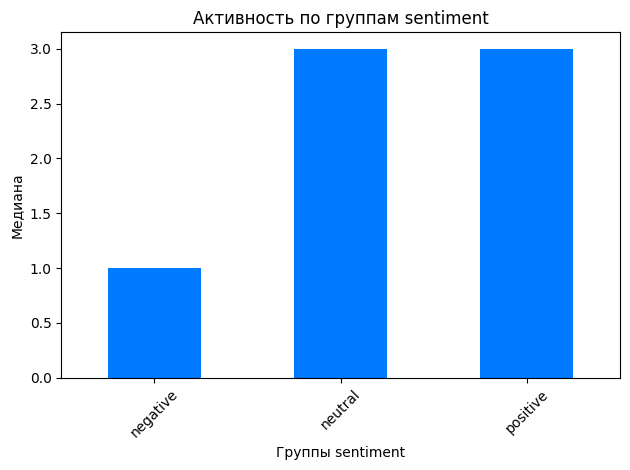

Группа positive: p-значение = 4.1286088943517063e-81
Группа neutral: p-значение = 3.6060163516190406e-148
Группа negative: p-значение = 1.2534041059393177e-54
Отвергаем нулевую гипотезу: распределение ненормальное.
Используем тест Краскала-Уоллиса.

p-значение теста Краскала-Уоллиса: 7.625243673784596e-12
Существует статистически значимое различие между группами (отвергаем нулевую гипотезу).
Группа 1: negative, Группа 2: neutral, p-value: 1.6158150522823057e-12, p-adj: 4.847445156846917e-12, Отклонить нулевую гипотезу: True
Группа 1: negative, Группа 2: positive, p-value: 3.957080572001198e-09, p-adj: 1.1871241716003594e-08, Отклонить нулевую гипотезу: True
Группа 1: neutral, Группа 2: positive, p-value: 0.17760910931244367, p-adj: 0.532827327937331, Отклонить нулевую гипотезу: False


/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 44776.
  res = hypotest_fun_out(*samples, **kwds)


In [18]:
check_reliability(df)

In [19]:
df_cats = df[df['category'] == 'Кошки']
df_dogs = df[df['category'] == 'Собаки']

sentiment_group
neutral     23590
positive     2840
negative      784
Name: count, dtype: int64


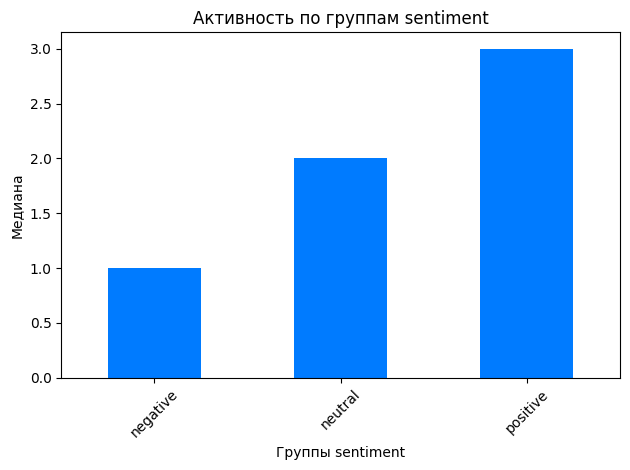

Группа positive: p-значение = 2.2734356244991387e-73
Группа neutral: p-значение = 4.122761756595229e-132
Группа negative: p-значение = 2.6790493741906554e-48
Отвергаем нулевую гипотезу: распределение ненормальное.
Используем тест Краскала-Уоллиса.

p-значение теста Краскала-Уоллиса: 1.9891166562148008e-06
Существует статистически значимое различие между группами (отвергаем нулевую гипотезу).
Группа 1: negative, Группа 2: neutral, p-value: 2.0106001213311952e-05, p-adj: 6.031800363993586e-05, Отклонить нулевую гипотезу: True
Группа 1: negative, Группа 2: positive, p-value: 2.6400784694126914e-07, p-adj: 7.920235408238074e-07, Отклонить нулевую гипотезу: True
Группа 1: neutral, Группа 2: positive, p-value: 0.009976939262945357, p-adj: 0.02993081778883607, Отклонить нулевую гипотезу: True


/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 23590.
  res = hypotest_fun_out(*samples, **kwds)


In [20]:
check_reliability(df_cats)

sentiment_group
neutral     21186
positive     1232
negative      341
Name: count, dtype: int64


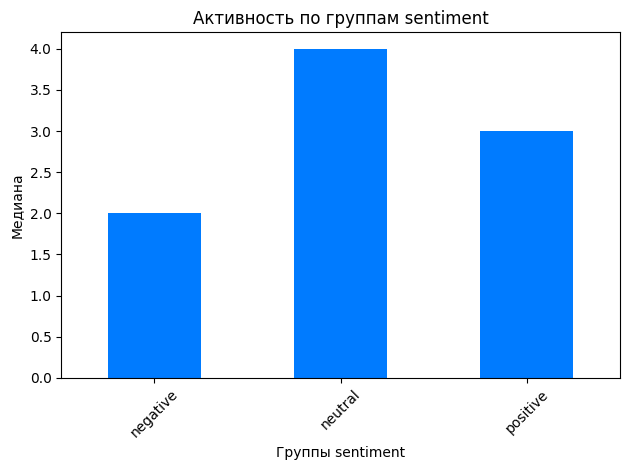

Группа positive: p-значение = 3.4705113155221326e-53
Группа neutral: p-значение = 5.361669139668286e-124
Группа negative: p-значение = 2.0398209128782446e-33
Отвергаем нулевую гипотезу: распределение ненормальное.
Используем тест Краскала-Уоллиса.

p-значение теста Краскала-Уоллиса: 0.00016470169927495734
Существует статистически значимое различие между группами (отвергаем нулевую гипотезу).
Группа 1: negative, Группа 2: neutral, p-value: 8.647695250575625e-05, p-adj: 0.00025943085751726873, Отклонить нулевую гипотезу: True
Группа 1: negative, Группа 2: positive, p-value: 0.004251361964020667, p-adj: 0.012754085892061999, Отклонить нулевую гипотезу: True
Группа 1: neutral, Группа 2: positive, p-value: 0.12798649715795551, p-adj: 0.38395949147386654, Отклонить нулевую гипотезу: False


/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 21186.
  res = hypotest_fun_out(*samples, **kwds)


In [21]:
check_reliability(df_dogs)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df = pd.read_excel('/Users/mac/Desktop/учеба/проект/avito_data_main.xlsx')
df = df.drop(columns=['item_id'])
df = df[['category', 'days_active', 'has_video', 'photo_count', 'title', 'title_length', 'description_length', 'description_word_count', 'DescriptionRu', 'breed', 'gender', 'age', 'price', 'contacts', 'favorites', 'sentiment']]
df

,category,days_active,has_video,photo_count,title,title_length,description_length,description_word_count,DescriptionRu,breed,gender,age,price,contacts,favorites,sentiment
0,Кошки,25,False,2,"Отдам котиков, в хорошие руки 4 мес",35,8,1,Красавцы,NaN,М,4.0,5,3,4,1.000000
1,Кошки,25,False,1,Бенгальская кошка,17,5,1,Супер,Бенгальская,Ж,NaN,655,0,0,0.999089
2,Кошки,11,False,5,Кот 3 года вислоухий,20,20,4,Кот красавец 3 года,NaN,М,36.0,0,0,0,0.997077
3,Кошки,25,False,1,Сибирская кошка,15,16,3,Красавица в дом!,Сибирская,Ж,NaN,-1,1,1,0.997066
4,Кошки,25,False,4,Кошки мейн-кун,14,21,3,Хорошая милая кошечка,Мейн-кун,Ж,NaN,8000,0,0,0.995826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49968,Кошки,25,False,10,Шотландская вислоухая кошка,27,146,24,"Кошке 4 года, не стерилизованная, ни разу не к...",Шотландская,Ж,48.0,3000,1,1,-0.673896
49969,Кошки,25,False,2,Британская вислоухая,20,100,22,Девочка. Уже больше года. У ребенка оказалась ...,Британская,Ж,NaN,1500,1,3,-0.710234
49970,Кошки,2,False,4,Красивые здоровые кот и кошка 3 года,36,216,26,"Умерла хозяйка, бабушка, кошки никому не нужны...",NaN,Ж,36.0,0,0,1,-0.714857
49971,Кошки,25,False,2,Кошка в дар бесплатно,21,50,11,без домная кошка мне 9 лет и мне очень жалко к...,NaN,Ж,108.0,0,0,0,-0.876198


In [5]:
df['activity'] = df['contacts']


In [6]:
df['activity'].describe()

count    49973.000000
mean         2.473316
std          7.505290
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        264.000000
Name: activity, dtype: float64

In [77]:
import scipy.stats as stats
from scipy.stats import kruskal, mannwhitneyu
from statsmodels.stats.multitest import multipletests
from scipy.stats import rankdata

In [72]:
def check_reliability(df):
    print(df['sentiment_group'].value_counts())
    mean_views = df.groupby('sentiment_group')['activity'].median().reindex([
    'negative', 'neutral', 'positive'
    ])

    
    mean_views.plot(kind='bar', color='#007BFF')
    plt.title('Активность по группам sentiment')
    plt.xlabel('Группы sentiment')
    plt.ylabel('Медиана')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    df_box = outlier(df, 'activity')

    plt.figure(figsize=(8, 6))
    sns.boxplot(x='sentiment_group', y='activity', data=df_box)
    plt.title('Popularity by Sentiment Group')
    plt.show()

    for group in df['sentiment_group'].unique():
        stat, p_value = stats.shapiro(df[df['sentiment_group'] == group]['activity'])
        print(f'Группа {group}: p-значение = {p_value}')

    if p_value > 0.05:
        print('Не отвергаем нулевую гипотезу: распределение нормальное.')
    else:
        print('Отвергаем нулевую гипотезу: распределение ненормальное.')

    normal_distribution = all([
    stats.shapiro(df[df['sentiment_group'] == group]['activity'])[1] > 0.05 
    for group in df['sentiment_group'].unique()
    ])

    if normal_distribution:
        print('Используем ANOVA.')
        anova_result = stats.f_oneway(
            df[df['sentiment_group'] == 'negative']['activity'],
            df[df['sentiment_group'] == 'neutral']['activity'],
            df[df['sentiment_group'] == 'positive']['activity']
        )
        print('p-значение ANOVA:', anova_result.pvalue)
    else:
        print('Используем тест Краскала-Уоллиса.')
        kruskal_result = stats.kruskal(
            df[df['sentiment_group'] == 'negative']['activity'],
            df[df['sentiment_group'] == 'neutral']['activity'],
            df[df['sentiment_group'] == 'positive']['activity']
        )
        print()
        print('p-значение теста Краскала-Уоллиса:', kruskal_result.pvalue)
        

    alpha = 0.05

    if 'anova_result' in locals():
        if anova_result.pvalue < alpha:
            print('Существует статистически значимое различие между группами (отвергаем нулевую гипотезу).')
        else:
            print('Нет статистически значимого различия между группами (не отвергаем нулевую гипотезу).')

    if 'kruskal_result' in locals():
        if kruskal_result.pvalue < alpha:
            print('Существует статистически значимое различие между группами (отвергаем нулевую гипотезу).')
        else:
            print('Нет статистически значимого различия между группами (не отвергаем нулевую гипотезу).')

    pairs = [('negative', 'neutral'), ('negative', 'positive'), ('neutral', 'positive')]
    results = []

    for group1, group2 in pairs:
        stat, p = mannwhitneyu(df[df['sentiment_group'] == group1]['activity'], df[df['sentiment_group'] == group2]['activity'])
        results.append({'group1': group1, 'group2': group2, 'p-value': p})

    p_values = [result['p-value'] for result in results]
    adjusted_p = multipletests(p_values, method='bonferroni')[1]

    for i, result in enumerate(results):
        result['p-adj'] = adjusted_p[i]
        result['reject'] = result['p-adj'] < alpha
        print(f"Группа 1: {result['group1']}, Группа 2: {result['group2']}, "
          f"p-value: {result['p-value']}, p-adj: {result['p-adj']}, "
          f"Отклонить нулевую гипотезу: {result['reject']}")

In [16]:
df['activity'] = (df['contacts'] + df['favorites']) / df['days_active']
df

,category,days_active,has_video,photo_count,title,title_length,description_length,description_word_count,DescriptionRu,breed,gender,age,price,contacts,favorites,sentiment,activity,sentiment_group
0,Кошки,25,False,2,"Отдам котиков, в хорошие руки 4 мес",35,8,1,Красавцы,NaN,М,4.0,5,3,4,1.000000,0.28,positive
1,Кошки,25,False,1,Бенгальская кошка,17,5,1,Супер,Бенгальская,Ж,NaN,655,0,0,0.999089,0.00,positive
2,Кошки,11,False,5,Кот 3 года вислоухий,20,20,4,Кот красавец 3 года,NaN,М,36.0,0,0,0,0.997077,0.00,positive
3,Кошки,25,False,1,Сибирская кошка,15,16,3,Красавица в дом!,Сибирская,Ж,NaN,-1,1,1,0.997066,0.08,positive
4,Кошки,25,False,4,Кошки мейн-кун,14,21,3,Хорошая милая кошечка,Мейн-кун,Ж,NaN,8000,0,0,0.995826,0.00,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49968,Кошки,25,False,10,Шотландская вислоухая кошка,27,146,24,"Кошке 4 года, не стерилизованная, ни разу не к...",Шотландская,Ж,48.0,3000,1,1,-0.673896,0.08,negative
49969,Кошки,25,False,2,Британская вислоухая,20,100,22,Девочка. Уже больше года. У ребенка оказалась ...,Британская,Ж,NaN,1500,1,3,-0.710234,0.16,negative
49970,Кошки,2,False,4,Красивые здоровые кот и кошка 3 года,36,216,26,"Умерла хозяйка, бабушка, кошки никому не нужны...",NaN,Ж,36.0,0,0,1,-0.714857,0.50,negative
49971,Кошки,25,False,2,Кошка в дар бесплатно,21,50,11,без домная кошка мне 9 лет и мне очень жалко к...,NaN,Ж,108.0,0,0,0,-0.876198,0.00,negative


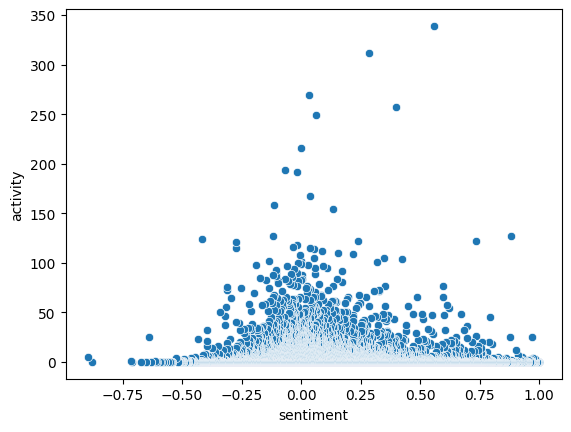

In [17]:
sns.scatterplot(x='sentiment', y='activity', data=df)


plt.show()

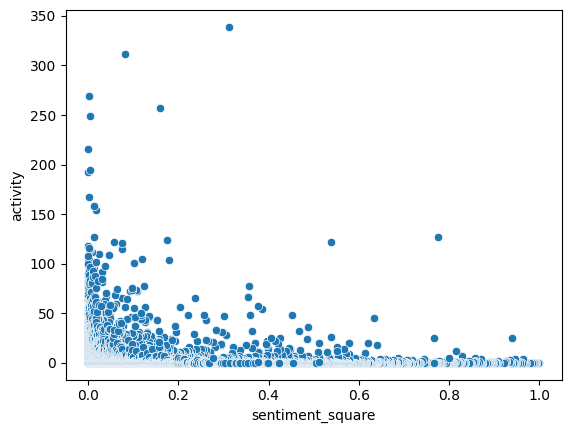

In [21]:
sns.scatterplot(x='sentiment_square', y='activity', data=df)


plt.show()

In [20]:
df

,category,days_active,has_video,photo_count,title,title_length,description_length,description_word_count,DescriptionRu,breed,gender,age,price,contacts,favorites,sentiment,activity,sentiment_group,activity_square,sentiment_square
0,Кошки,25,False,2,"Отдам котиков, в хорошие руки 4 мес",35,8,1,Красавцы,NaN,М,4.0,5,3,4,1.000000,0.28,positive,0.0784,1.000000
1,Кошки,25,False,1,Бенгальская кошка,17,5,1,Супер,Бенгальская,Ж,NaN,655,0,0,0.999089,0.00,positive,0.0000,0.998179
2,Кошки,11,False,5,Кот 3 года вислоухий,20,20,4,Кот красавец 3 года,NaN,М,36.0,0,0,0,0.997077,0.00,positive,0.0000,0.994163
3,Кошки,25,False,1,Сибирская кошка,15,16,3,Красавица в дом!,Сибирская,Ж,NaN,-1,1,1,0.997066,0.08,positive,0.0064,0.994141
4,Кошки,25,False,4,Кошки мейн-кун,14,21,3,Хорошая милая кошечка,Мейн-кун,Ж,NaN,8000,0,0,0.995826,0.00,positive,0.0000,0.991670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49968,Кошки,25,False,10,Шотландская вислоухая кошка,27,146,24,"Кошке 4 года, не стерилизованная, ни разу не к...",Шотландская,Ж,48.0,3000,1,1,-0.673896,0.08,negative,0.0064,0.454135
49969,Кошки,25,False,2,Британская вислоухая,20,100,22,Девочка. Уже больше года. У ребенка оказалась ...,Британская,Ж,NaN,1500,1,3,-0.710234,0.16,negative,0.0256,0.504433
49970,Кошки,2,False,4,Красивые здоровые кот и кошка 3 года,36,216,26,"Умерла хозяйка, бабушка, кошки никому не нужны...",NaN,Ж,36.0,0,0,1,-0.714857,0.50,negative,0.2500,0.511020
49971,Кошки,25,False,2,Кошка в дар бесплатно,21,50,11,без домная кошка мне 9 лет и мне очень жалко к...,NaN,Ж,108.0,0,0,0,-0.876198,0.00,negative,0.0000,0.767724


In [22]:
df.to_excel('avito_advanced_data.xlsx')

sentiment_group
neutral     44776
positive     4072
negative     1125
Name: count, dtype: int64


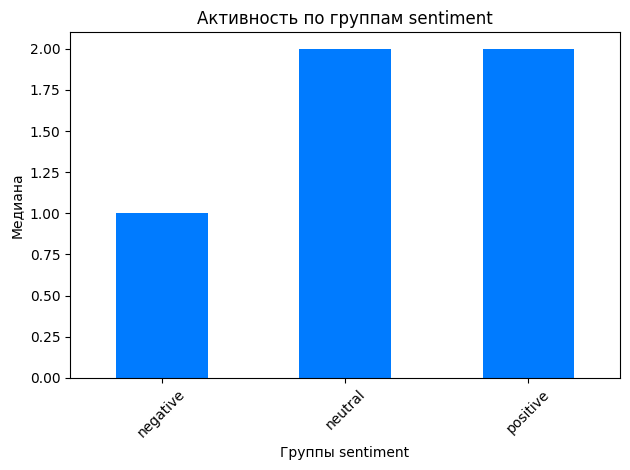

Группа positive: p-значение = 1.2865683886207419e-80
Группа neutral: p-значение = 1.92914325455103e-149
Группа negative: p-значение = 3.895857675997821e-55
Отвергаем нулевую гипотезу: распределение ненормальное.
Используем тест Краскала-Уоллиса.

p-значение теста Краскала-Уоллиса: 4.542244574216528e-11
Существует статистически значимое различие между группами (отвергаем нулевую гипотезу).
Группа 1: negative, Группа 2: neutral, p-value: 1.5069830352104154e-11, p-adj: 4.520949105631246e-11, Отклонить нулевую гипотезу: True
Группа 1: negative, Группа 2: positive, p-value: 5.640605046799765e-08, p-adj: 1.6921815140399297e-07, Отклонить нулевую гипотезу: True
Группа 1: neutral, Группа 2: positive, p-value: 0.09274198978370052, p-adj: 0.27822596935110155, Отклонить нулевую гипотезу: False


/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 44776.
  res = hypotest_fun_out(*samples, **kwds)


In [13]:
check_reliability(df)

In [23]:
df_last = pd.read_excel('/Users/mac/Desktop/учеба/проект/avito_data_main.xlsx')
df_last

,item_id,category,days_active,has_video,photo_count,title,title_length,description_length,description_word_count,DescriptionRu,...,seller_count_reviews,seller_rating,page_views,page_views_by_day,contacts,favorites,conversion_page_views_contacts_%,conversion_page_views_favorites_%,conversion_page_views_favorites_contacts_%,sentiment
0,3883313327552309760,Кошки,25,False,2,"Отдам котиков, в хорошие руки 4 мес",35,8,1,Красавцы,...,NaN,NaN,106,4.240000,3,4,0.03,0.75,0.04,1.000000
1,3002289748139043840,Кошки,25,False,1,Бенгальская кошка,17,5,1,Супер,...,0.0,0.0,36,1.440000,0,0,0.00,NaN,0.00,0.999089
2,4649905965887619072,Кошки,11,False,5,Кот 3 года вислоухий,20,20,4,Кот красавец 3 года,...,1.0,1.0,5,0.454545,0,0,0.00,NaN,0.00,0.997077
3,5406398888000874496,Кошки,25,False,1,Сибирская кошка,15,16,3,Красавица в дом!,...,2.0,5.0,56,2.240000,1,1,0.02,1.00,0.02,0.997066
4,5841270525617292288,Кошки,25,False,4,Кошки мейн-кун,14,21,3,Хорошая милая кошечка,...,0.0,0.0,19,0.760000,0,0,0.00,NaN,0.00,0.995826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49968,6210833791942923264,Кошки,25,False,10,Шотландская вислоухая кошка,27,146,24,"Кошке 4 года, не стерилизованная, ни разу не к...",...,13.0,5.0,19,0.760000,1,1,0.05,1.00,0.05,-0.673896
49969,7914380850877753344,Кошки,25,False,2,Британская вислоухая,20,100,22,Девочка. Уже больше года. У ребенка оказалась ...,...,1.0,5.0,72,2.880000,1,3,0.01,0.33,0.04,-0.710234
49970,1007842829568802048,Кошки,2,False,4,Красивые здоровые кот и кошка 3 года,36,216,26,"Умерла хозяйка, бабушка, кошки никому не нужны...",...,23.0,5.0,33,16.500000,0,1,0.00,0.00,0.03,-0.714857
49971,6442878243383320576,Кошки,25,False,2,Кошка в дар бесплатно,21,50,11,без домная кошка мне 9 лет и мне очень жалко к...,...,0.0,0.0,19,0.760000,0,0,0.00,NaN,0.00,-0.876198


In [24]:
df_new = pd.read_excel('/Users/mac/Desktop/учеба/проект/avito_advanced_data.xlsx')
df_new

,Unnamed: 0,category,days_active,has_video,photo_count,title,title_length,description_length,description_word_count,DescriptionRu,...,gender,age,price,contacts,favorites,sentiment,activity,sentiment_group,activity_square,sentiment_square
0,0,Кошки,25,False,2,"Отдам котиков, в хорошие руки 4 мес",35,8,1,Красавцы,...,М,4.0,5,3,4,1.000000,0.28,positive,0.0784,1.000000
1,1,Кошки,25,False,1,Бенгальская кошка,17,5,1,Супер,...,Ж,NaN,655,0,0,0.999089,0.00,positive,0.0000,0.998179
2,2,Кошки,11,False,5,Кот 3 года вислоухий,20,20,4,Кот красавец 3 года,...,М,36.0,0,0,0,0.997077,0.00,positive,0.0000,0.994163
3,3,Кошки,25,False,1,Сибирская кошка,15,16,3,Красавица в дом!,...,Ж,NaN,-1,1,1,0.997066,0.08,positive,0.0064,0.994141
4,4,Кошки,25,False,4,Кошки мейн-кун,14,21,3,Хорошая милая кошечка,...,Ж,NaN,8000,0,0,0.995826,0.00,positive,0.0000,0.991670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49968,49968,Кошки,25,False,10,Шотландская вислоухая кошка,27,146,24,"Кошке 4 года, не стерилизованная, ни разу не к...",...,Ж,48.0,3000,1,1,-0.673896,0.08,negative,0.0064,0.454135
49969,49969,Кошки,25,False,2,Британская вислоухая,20,100,22,Девочка. Уже больше года. У ребенка оказалась ...,...,Ж,NaN,1500,1,3,-0.710234,0.16,negative,0.0256,0.504433
49970,49970,Кошки,2,False,4,Красивые здоровые кот и кошка 3 года,36,216,26,"Умерла хозяйка, бабушка, кошки никому не нужны...",...,Ж,36.0,0,0,1,-0.714857,0.50,negative,0.2500,0.511020
49971,49971,Кошки,25,False,2,Кошка в дар бесплатно,21,50,11,без домная кошка мне 9 лет и мне очень жалко к...,...,Ж,108.0,0,0,0,-0.876198,0.00,negative,0.0000,0.767724


In [57]:
df_new['page_views'] = df_last['page_views']
df_new['page_views_td'] = df_new['page_views'] / df_new['days_active']



# Финалочка

In [ ]:
def check_reliability(df):
    print(df['sentiment_group'].value_counts())
    mean_views = df.groupby('sentiment_group')['activity'].median().reindex([
    'negative', 'neutral', 'positive'
    ])

    
    mean_views.plot(kind='bar', color='#007BFF')
    plt.title('Активность по группам sentiment')
    plt.xlabel('Группы sentiment')
    plt.ylabel('Медиана')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    df_box = outlier(df, 'activity')

    plt.figure(figsize=(8, 6))
    sns.boxplot(x='sentiment_group', y='activity', data=df_box)
    plt.title('Popularity by Sentiment Group')
    plt.show()

    for group in df['sentiment_group'].unique():
        stat, p_value = stats.shapiro(df[df['sentiment_group'] == group]['activity'])
        print(f'Группа {group}: p-значение = {p_value}')

    if p_value > 0.05:
        print('Не отвергаем нулевую гипотезу: распределение нормальное.')
    else:
        print('Отвергаем нулевую гипотезу: распределение ненормальное.')

    normal_distribution = all([
    stats.shapiro(df[df['sentiment_group'] == group]['activity'])[1] > 0.05 
    for group in df['sentiment_group'].unique()
    ])

    if normal_distribution:
        print('Используем ANOVA.')
        anova_result = stats.f_oneway(
            df[df['sentiment_group'] == 'negative']['activity'],
            df[df['sentiment_group'] == 'neutral']['activity'],
            df[df['sentiment_group'] == 'positive']['activity']
        )
        print('p-значение ANOVA:', anova_result.pvalue)
    else:
        print('Используем тест Краскала-Уоллиса.')
        kruskal_result = stats.kruskal(
            df[df['sentiment_group'] == 'negative']['activity'],
            df[df['sentiment_group'] == 'neutral']['activity'],
            df[df['sentiment_group'] == 'positive']['activity']
        )
        print()
        print('p-значение теста Краскала-Уоллиса:', kruskal_result.pvalue)
        

    alpha = 0.05

    if 'anova_result' in locals():
        if anova_result.pvalue < alpha:
            print('Существует статистически значимое различие между группами (отвергаем нулевую гипотезу).')
        else:
            print('Нет статистически значимого различия между группами (не отвергаем нулевую гипотезу).')

    if 'kruskal_result' in locals():
        if kruskal_result.pvalue < alpha:
            print('Существует статистически значимое различие между группами (отвергаем нулевую гипотезу).')
        else:
            print('Нет статистически значимого различия между группами (не отвергаем нулевую гипотезу).')

    pairs = [('negative', 'neutral'), ('negative', 'positive'), ('neutral', 'positive')]
    results = []

    for group1, group2 in pairs:
        stat, p = mannwhitneyu(df[df['sentiment_group'] == group1]['activity'], df[df['sentiment_group'] == group2]['activity'])
        results.append({'group1': group1, 'group2': group2, 'p-value': p})

    p_values = [result['p-value'] for result in results]
    adjusted_p = multipletests(p_values, method='bonferroni')[1]

    for i, result in enumerate(results):
        result['p-adj'] = adjusted_p[i]
        result['reject'] = result['p-adj'] < alpha
        print(f"Группа 1: {result['group1']}, Группа 2: {result['group2']}, "
          f"p-value: {result['p-value']}, p-adj: {result['p-adj']}, "
          f"Отклонить нулевую гипотезу: {result['reject']}")

In [60]:
def classify(score):
        q25 = -0.05304310377687216
        q75 = 0.1511594504117966
        if score <= q25:
            return 'negative'
        elif score >= q75:
            return 'positive'
        else:
            return 'neutral'
        


In [50]:
classify(-0.9999)

np.float64(-0.05304310377687216)

In [61]:
df['sentiment_group'] = df['sentiment'].apply(classify)

In [62]:
df

,category,days_active,has_video,photo_count,title,title_length,description_length,description_word_count,DescriptionRu,breed,gender,age,price,contacts,favorites,sentiment,activity,sentiment_group
0,Кошки,25,False,2,"Отдам котиков, в хорошие руки 4 мес",35,8,1,Красавцы,NaN,М,4.0,5,3,4,1.000000,0.28,positive
1,Кошки,25,False,1,Бенгальская кошка,17,5,1,Супер,Бенгальская,Ж,NaN,655,0,0,0.999089,0.00,positive
2,Кошки,11,False,5,Кот 3 года вислоухий,20,20,4,Кот красавец 3 года,NaN,М,36.0,0,0,0,0.997077,0.00,positive
3,Кошки,25,False,1,Сибирская кошка,15,16,3,Красавица в дом!,Сибирская,Ж,NaN,-1,1,1,0.997066,0.08,positive
4,Кошки,25,False,4,Кошки мейн-кун,14,21,3,Хорошая милая кошечка,Мейн-кун,Ж,NaN,8000,0,0,0.995826,0.00,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49968,Кошки,25,False,10,Шотландская вислоухая кошка,27,146,24,"Кошке 4 года, не стерилизованная, ни разу не к...",Шотландская,Ж,48.0,3000,1,1,-0.673896,0.08,negative
49969,Кошки,25,False,2,Британская вислоухая,20,100,22,Девочка. Уже больше года. У ребенка оказалась ...,Британская,Ж,NaN,1500,1,3,-0.710234,0.16,negative
49970,Кошки,2,False,4,Красивые здоровые кот и кошка 3 года,36,216,26,"Умерла хозяйка, бабушка, кошки никому не нужны...",NaN,Ж,36.0,0,0,1,-0.714857,0.50,negative
49971,Кошки,25,False,2,Кошка в дар бесплатно,21,50,11,без домная кошка мне 9 лет и мне очень жалко к...,NaN,Ж,108.0,0,0,0,-0.876198,0.00,negative


In [ ]:
df_neu = df[df['sentiment_group'] == 'neutral']

sentiment_group
neutral     24981
positive    12498
negative    12494
Name: count, dtype: int64


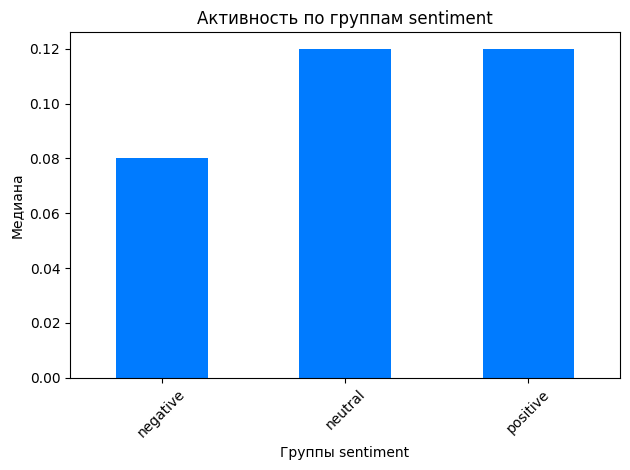

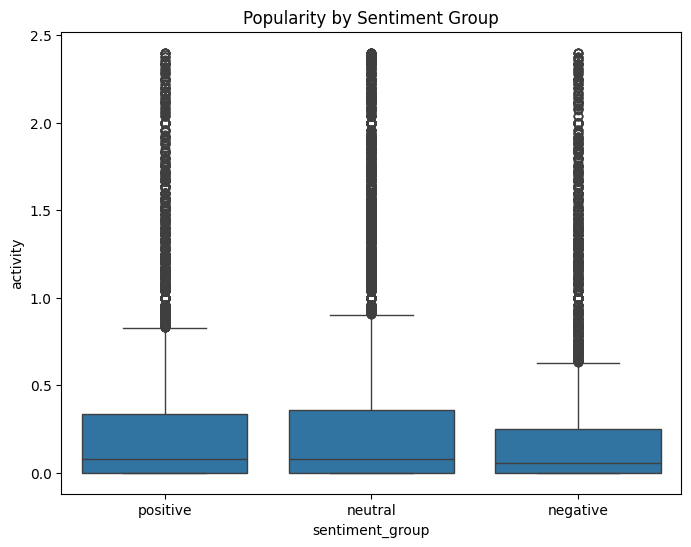

Группа positive: p-значение = 9.009429123921411e-117
Группа neutral: p-значение = 3.97481810006514e-135
Группа negative: p-значение = 1.7952798979567593e-115
Отвергаем нулевую гипотезу: распределение ненормальное.
Используем тест Краскала-Уоллиса.

p-значение теста Краскала-Уоллиса: 7.533136376375139e-51
Существует статистически значимое различие между группами (отвергаем нулевую гипотезу).
Группа 1: negative, Группа 2: neutral, p-value: 1.479078947819575e-51, p-adj: 4.437236843458725e-51, Отклонить нулевую гипотезу: True
Группа 1: negative, Группа 2: positive, p-value: 1.240029667785073e-21, p-adj: 3.720089003355219e-21, Отклонить нулевую гипотезу: True
Группа 1: neutral, Группа 2: positive, p-value: 1.2313322006025967e-05, p-adj: 3.69399660180779e-05, Отклонить нулевую гипотезу: True


/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12498.
  res = hypotest_fun_out(*samples, **kwds)
/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 24981.
  res = hypotest_fun_out(*samples, **kwds)
/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12494.
  res = hypotest_fun_out(*samples, **kwds)


In [73]:
check_reliability(df)